# Intro to Python and ML Libraries
## ITCS 4156 Intro to Machine Learning
### Instructor: Xiang Zhang


For those new to Python or NumPy this notebook aims to provide you with a quick and basic introduction to these concepts. You should refer back to this notebook throughout the semester when you need programming help!

Each Python library is super comprehensive, and you need around one week for each library if you really want to master it. You don't have enough time to learn everything for sure. So my suggestion is: to get a high-level idea of each tool/library, and search the specific command/function when it's needed in coding. 
 

Check the Python cheatsheets for [Numpy, Pandas, Matplotlib, and Sk-Learn](https://web.itu.edu.tr/iguzel/files/Python_Cheat_Sheets.pdf). 


### Topics
- Brief Introduction to Jupyter Notebooks

- Python
    - Basic Data Types
    - Containers
    - For Loops and List Comprehension 
    - Lambda Functions
    - Debugging
- NumPy
    - Generating Arrays (ndarray)
    - Indexing Arrays
    - Copying and Slices
    - Reshaping and Adding New Dimensions
    - What is an Axis?
    - Datatypes
    - List Comprehension with Arrays
    - Searching Arrays: Finding Specific Values and Indexes
    - Array Operations
    - Matmul, Shape Mismatch, and Broadcasting Errors
- Pandas
    - DataFrames
    - Indexing DataFrames
- Matplotlib
    - Basic Line Plotting
<hr>

**References**
  - [1] Python Numpy Tutorial (with Jupyter and Colab).” https://cs231n.github.io/python-numpy-tutorial/#python


In [1]:
# Additional imports beyond the scope of this lab
import traceback # Useful for printing errors cause by try-catches
import random

# Set NumPy random seed for replication
random.seed(0)

# Varaible for enabling or disabling debugging
# in the debugging sub-section. For TA convenience! 
enable_debug = True

# Assert whether TODO gives the desired output
def todo_check(condi_err):
    failed_err = "You passed {}/{} and FAILED the following code checks:{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(condi_err):
        if not condi:
            n_failed += 1
            failed += f"\nFailed check [{check+1}]:\n\t Tip: {err}"

    if len(failed) != 0:
        passed = len(condi_err) - n_failed
        err = failed_err.format(passed, len(condi_err), failed)
        raise AssertionError(err.format(failed))
    print("Your code PASSED the code check!")

# What is a Jupyter Notebook?

A Jupyter notebook is made up of a number of cells. Each cell can contain Python code. There are two main types of cells: `Code` cells and `Markdown` cells. This particular cell is a `Markdown` cell. You can execute a particular cell by double clicking on it (the highlight color will switch from blue to green) and pressing `Shift-Enter`. When you do so, if the cell is a `Code` cell, the code in the cell will run, and the output of the cell will be displayed beneath the cell, and if the cell is a `Markdown` cell, the markdown text will get rendered beneath the cell [1].

**On the top menu, click "Help" --> "Edit Keyboard Shortcuts" to customize the shortcuts that fit your taste!**

Go ahead and try executing this cell.

The cell below is a `Code` cell. Go ahead and click it, then execute it as well.

In [2]:
x = 1
print(x)

1


**Global variables** are shared between cells. Notice, **that the `x` defined in the previous cell carries over to this cell.**

In [3]:
y = 2 * x
print(y)

2


While these global definitions can be useful that can also give beginners some trouble. If you run cells out of order you might get errors you weren't expecting as some cells might depend on other cells being ran first! You typically want to run a notebook sequentially unless you know what you are doing. 

Notice, when you run the below cell we get the error `NameError: name 'my_variable' is not defined` (notice we caught said error with a try-catch). This is because we haven't ran the cell that defines `my_variable` yet.

In [4]:
try:
    print(my_variable)
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\2794491730.py", line 2, in <module>
    print(my_variable)
NameError: name 'my_variable' is not defined


In [5]:
my_variable = "This variable is now initialized!"

Once we initialize `my_variable`. We can call it without any errors!

In [6]:
print(my_variable)

This variable is now initialized!


## Keyboard Shortcuts

There are a few keyboard shortcuts you should be aware of to make your notebook experience more pleasant. 

* Double click a Markdown cell to edit it
* To run a cell and move to the next cell, press `shift+enter`
    * Running a Markdown cell will render the cell!
* To run a cell and remain on the current cell, press `control+enter`
* To place a cell below the current one, press `esc+b`.
* To place a cell above the current one, press `esc+a`.
* To delete a cell, press `esc+dd`.
* To undo deleted cell, press `esc+z`.
* To convert a cell to `Markdown` press `esc+m`.
* To convert it back to `Code` press `esc+y`.

Get familiar with these keyboard shortcuts, they really help!

### Restarting the notebook kernel
You can restart a notebook and clear all cells by clicking `Kernel -> Restart & Clear Output`. If you don't want to clear cell outputs, just hit `Kernel -> Restart`. Once again, restarting will be your go to option when you are getting any weird errors. It is akin to restarting your computer when you run into weird computer errors [1].

### Saving the notebook
After you have modified a notebook for one of the assignments by modifying or executing some of its cells, remember to save your changes! You can save with the `Command/Control + s` shortcut or by clicking `File -> Save and Checkpoint` [1].

# Python

Python is a high-level, [dynamically typed](https://stackoverflow.com/questions/1517582/what-is-the-difference-between-statically-typed-and-dynamically-typed-languages) (we don't have to specify the type for the variable) [multiparadigm programming language](https://msritse2012.wordpress.com/2013/01/31/the-concept-of-multi-paradigm-programming-language-manjunath-m/) (supports multiple programming paradigms such as functional and object oriented). Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable [1].

**For this class we will be using Python 3.8 and above.** The below code checks to see if your python version is 3.8 or greater. If it is note, please install a version of Python that is 3.8 or above. You can do so by entering the following line into your command line or Anaconda prompt `conda install python=3.8` or see this [post](https://stackoverflow.com/questions/52035673/how-can-i-update-to-the-latest-python-version-using-conda).

In [7]:
from platform import python_version
import sys
print(f"Your python version is {python_version()}")
assert sys.version_info >= (3, 8), "Your python version {python_version()} is less than the required version for this course! Please try updating you python version."

Your python version is 3.9.13


## Basic Data Types

Like most languages, Python has a number of basic types including integers, floats, booleans, and strings. These data types behave in ways that are familiar from other programming languages [1].

### Numbers 

Integers and floats work as you would expect from other languages.

Note that we use Python's built in `type` function to check the type of a variable!

#### TODO 1
1. Declare a Python integer by  declaring a variable `x` and setting it equal to 3 using the `=` symbol.

**Write your code below the line of "TODO"**

In [8]:
# TODO 1.1 
x=3
print(f"x is equal to {x}")

# This a automatic check to make sue your todo was completed correctly!
# If you pass this check then you are likely to receive full points on the TODO if 
# you completed it as specified!
todo_check([
    (x == 3, 'x is must be set to 3!')
])

x is equal to 3
Your code PASSED the code check!


Below are examples some different operations we can perform on integers!

In [9]:
print(f"Check type of x using `type(x)`: {type(x)}") # Prints "<class 'int'>"
print(f"Value of x: {x}")       # Prints "3"
print(f"Value of x + 1: {x + 1}")   # Addition; prints "4"
print(f"Value of x - 1: {x - 1}")   # Subtraction; prints "2"
print(f"Value of x * 2: {x * 2}")   # Multiplication; prints "6"
print(f"Value of x^2 or x**2: {x ** 2}")  # Exponentiation; prints "9"

Check type of x using `type(x)`: <class 'int'>
Value of x: 3
Value of x + 1: 4
Value of x - 1: 2
Value of x * 2: 6
Value of x^2 or x**2: 9


We can quickly add to `x` by doing the following. Likewise, this same idea works for multiplication and subtraction.

In [10]:
x += 1
x

4

Next we can see the same ideas apply to floats.

#### TODO 2
1. Declare a Python float by declaring a variable `y` and setting it equal to 2.5 using the `=` symbol.

In [11]:
# TODO 2.1
y=2.5
print(f"y is equal to {y}")

todo_check([
    (y == 2.5, 'y is must be set to 2.5!')
])

y is equal to 2.5
Your code PASSED the code check!


In [12]:
print(f"Check type of x using `type(y)`: {type(y)}") # Prints "<class 'int'>"
print(f"Value of y: {y}")       # Prints "3"
print(f"Value of y + 1: {y + 1}")   # Addition; prints "4"
print(f"Value of y - 1: {y - 1}")   # Subtraction; prints "2"
print(f"Value of y * 2: {y * 2}")   # Multiplication; prints "6"
print(f"Value of y^2 or y**2: {y ** 2}")  # Exponentiation; prints "9"

Check type of x using `type(y)`: <class 'float'>
Value of y: 2.5
Value of y + 1: 3.5
Value of y - 1: 1.5
Value of y * 2: 5.0
Value of y^2 or y**2: 6.25


### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols ($\&\&$, $||$, etc.) [1].


#### TODO 3
1. Declare a Python boolean by declaring the variable `t` and setting it equal to True using the `=` symbol. 
2. Next, declare a Python boolean by declaring the variable `f` and setting it equal to False using the `=` symbol.

In [13]:
# TODO 3.1
t = True
# TODO 3.2
f = False
todo_check([
    (t == True, 't must be equal to True!'),
    (f == False, 'f must be equal to False!'),
])


Your code PASSED the code check!


Given two booleans we can perform different boolean operations such as "and" and "or".

In [14]:
print(f"Check type of t using `type(t)`: {type(t)}") # Prints "<class 'bool'>"
print(f"Logical AND: {t and f}") # Logical AND; prints "False"
print(f"Logical OR: {t or f}") 
print(f"NOT or opposite of t value: {not t}") 
print(f"Logical XOR: {t != f}") 

Check type of t using `type(t)`: <class 'bool'>
Logical AND: False
Logical OR: True
NOT or opposite of t value: False
Logical XOR: True


### Strings
Python has great support for strings, checkout some of the following things you can do [1].

Let's practice declaring strings using either single quotes ' ' or double quotes " " to declare a string. Typically, people use single quotes ' ' when creating a string that is a single character or word. Likewise, people use double quotes " " when creating a string that is a sentence. However, this rule is rather arbitrary and either can be used in practice.  

#### TODO 4

1. Declare the string "hello" and store the it in the variable `hello`.
2. Declare the string "world" and store the it in the variable `world`.

In [15]:
# TODO 4.1
hello = "hello"
world = "world"
# TODO 4.2


print(hello, world)
todo_check([
    (hello == 'hello', "hello should be set to 'hello'"),
    (world == 'world', "world should be set to 'world'"),
])

hello world
Your code PASSED the code check!


As we will see, strings are essentially lists so we can use Python's `len()` function to check the length of a string.

In [16]:
print(len(hello))  # String length; prints "5"

5


We can concatenate strings by doing the following.

In [17]:
hw = hello + ' ' + world  # String concatenation
hw

'hello world'

Additionally, we can create formatted strings by doing either of the following. Note that the first two methods are the more modern versions of formatting string while the third method is the classical way for formatting string, regardless any of the following are fine.

In [18]:
hw12 = f"{hello} {world} {12}"
print(hw12)

hw12 = "{} {} {}".format(hello, world, 12)
print(hw12)

hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)

hello world 12
hello world 12
hello world 12


## Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples [1].

### Lists

A list is the Python equivalent of an array from Java or C++, however Python lists are resizable and can contain elements of different types. (Soon we will see how NumPy arrays build upon this idea of lists!)

- Additional Sources
    - [Python List Official Docs](https://docs.python.org/3.5/tutorial/datastructures.html#more-on-lists)
    - [Real Python Introduction to Lists and Tuples](https://realpython.com/python-lists-tuples/)

To do so, use the using the square bracket syntax `[ ]` as shown in this [guide](https://realpython.com/python-lists-tuples/). 

In [19]:
x_list = [3, 1, 2]
print(f"x_list was set to {x_list}")

x_list was set to [3, 1, 2]


We can check the length of a list using the Python `len()` function mentioned earlier and passing the list to the function `len(x_list)`.

In [20]:
x_list_len = len(x_list)
print(f"The length of x_list is {x_list_len}")

The length of x_list is 3


Here we can index the second element simply by doing the following! (We will look at indexing multiple values in the List Comprehension section which utilizes for loops)

The index of the elements start from *0* not 1. Which means, `x_list[0]` is the first element in list `x_list`.

In [21]:
x_list[1]

1

Notice that a negative index indicates indexing is down from the end of the list instead. This is a very important idea as it applies to most all container types in Python and also NumPy arrays! 

In [22]:
x_list[-1]

2

Lists can contain elements of different types and we can set an element by doing the following

In [23]:
x_list[2] = 'foo'
x_list # displays "[3, 1, 'foo']"

[3, 1, 'foo']

Add a new element to the end of the list.

In [24]:
x_list.append('bar')
x_list

[3, 1, 'foo', 'bar']

Remove and return the last element of the list.

In [25]:
x = x_list.pop()
print(x, x_list)


bar [3, 1, 'foo']


#### Slicing/Indexing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists or multiple elements of data in a list at once. This is known as slicing. (This same idea of slicing will apply to NumPy arrays, TensorFlow Tensors, and Pandas DataFrames later on.)

- Additional Sources
    - [Stackoverflow discussion](https://stackoverflow.com/questions/4012340/colon-in-python-list-index) on using `:` with lists
    - [Real Python intro to slicing](https://realpython.com/lessons/indexing-and-slicing/)

We can quickly define a list by using Python's built-in functions `list` and `range`. Range is a built-in function that creates a generator of integers. [Generators](https://realpython.com/introduction-to-python-generators/) are objects that generator outputs on the fly instead of creating all the desired outputs at once and filling up memory.

In [26]:
nums = list(range(5))# range is a built-in function that creates a list of integers
nums

[0, 1, 2, 3, 4]

We can easily specify a slice of a list by using a colon `:`. To get a slice from index 2 to 4 (exclusive) we do the following.

In [27]:
nums[2:4]

[2, 3]

To get a slice from index 2 to the end we do.

In [28]:
nums[2:]

[2, 3, 4]

To get a slice that starts at the beginning and ends at the index 2 (exclusive).

In [29]:
nums[:2]

[0, 1]

Get a slice of the whole list

In [30]:
nums[:]

[0, 1, 2, 3, 4]

Slice indices can be negative as well.

In [31]:
nums[:-1]

[0, 1, 2, 3]

Finally, we can assign a sub-list to a slice.

In [32]:
nums[2:4] = [8, 9]
nums  

[0, 1, 8, 9, 4]


### TODO 5
List and indexing practice.

1. Create a list containing all even numbers up to and including 100. Store the list in a variable called `even_list`. Try using Pythons `range()` function ([docs](https://docs.python.org/3/library/functions.html#func-range))and then casting it as a list using `list()`. **You SHOULD NOT write out the list by hand or you will not get any points!** 
3. Check the length of the `even_list`. Store the output into the `even_list_length` variable.
2. Use list indexing to return the last 5 elements of the `even_list`. Store the output into `last_five_even_elements`.
3. Use list indexing to return the second to last element of the `even_list`. Store the output into `second_to_last_even_element`.
4. Use list indexing to return the first 10 elements of the `even_list`. Store the output into `first_ten_even_elements`.

In [33]:
# TODO 5.1
even_list =  list(range(2,101,2))
print(f"even_list output: {even_list}")

todo_check([
    (even_list == [2,  4,  6,  8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98,  100],
    'even_list does not match the desired output! Make sure you have even numbers from 2 to and including 100!')
    ])

even_list output: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
Your code PASSED the code check!


In [34]:
# TODO 5.2
even_list_length = len(even_list)
print(f"even_list_length output: {even_list_length}")

todo_check([
    (even_list_length == 50, 'even_list_length should be 50')
])

even_list_length output: 50
Your code PASSED the code check!


In [35]:
# TODO 5.3
last_five_even_elements =  even_list[45:]
print(f"last_five_even_elements output: {last_five_even_elements}")

todo_check([
    (last_five_even_elements == [92, 94, 96, 98, 100], 'last_five_even_elements does not match [92, 94, 96, 98, 100]'),
])

last_five_even_elements output: [92, 94, 96, 98, 100]
Your code PASSED the code check!


In [36]:
second_to_last_even_element =  even_list[48:49]
print(f"second_to_last_even_element output: {second_to_last_even_element}")

second_to_last_even_element output: [98]


In [37]:
# TODO 5.4
second_to_last_even_element =  even_list[-2]
print(f"second_to_last_even_element output: {second_to_last_even_element}")

todo_check([
    (second_to_last_even_element == 98, "second_to_last_even_element should be 98")
])

second_to_last_even_element output: 98
Your code PASSED the code check!


In [38]:
# TODO 5.5
first_ten_even_elements = even_list[0:10]
print(f"first_ten_even_elements output: {first_ten_even_elements}")

todo_check([
    (first_ten_even_elements == [2,  4,  6,  8,  10,  12,  14,  16,  18,  20],
    "first_ten_even_elements should be [2,  4,  6,  8,  10,  12,  14,  16,  18,  20]")
])

first_ten_even_elements output: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
Your code PASSED the code check!


### Dictionaries

A dictionary stores key-value pairs, similar to a Map in Java. Keys are unique within a dictionary while values may not be. The values of a dictionary can be of any type, but the keys must be of an immutable data type (meaning its values can't be changed once set) such as strings, numbers, or tuples.

- Additional Information
    - [Real Python Dictionary Tutorial](https://realpython.com/python-dicts/).

We can create a dictionary simply by doing either of the following.

In [39]:
d = {'cat': 'cute', 'dog': 'furry'}
d

{'cat': 'cute', 'dog': 'furry'}

In [40]:
# OR
d = dict(cat='cute', dog='furry')
d

{'cat': 'cute', 'dog': 'furry'}

To get a value of a particular key simply index said key.

In [41]:
print(d['cat'])

cute


We can easily create an entry by doing the following.

In [42]:
d['fish'] = 'wet'
d['fish']

'wet'

If the key doesn't exist Python will throw a runtime error! Below we catch this error for you.

In [43]:
try:
    print(d['monkey']) 
except KeyError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\2298354547.py", line 2, in <module>
    print(d['monkey'])
KeyError: 'monkey'


To check if the key exists, to avoid errors simply use the `in` Python keyword.

In [44]:
print('cat' in d) 

True


If we don't know if a key will exists we can use the `.get()` method to get an element where a default value is return if the key is not found. If no default value is given, then Python uses `None` as the default value.

In [45]:
d.get('monkey', 'Key does not exist')

'Key does not exist'

Get an element with a default value where key exists.

In [46]:
d.get('fish', 'Key does not exist')

'wet'

To remove an element from a dictionary. Notice the key "fish" is no longer a key so we get "N/A" the default value when using `.get()`.

In [47]:
d['fish'] = 'wet'
d['fish']

'wet'

In [48]:
del d['fish'] 
d.get('fish', 'Key does not exist')

'Key does not exist'

### Tuples

A tuple is an immutable (meaning its values can't be changed once set) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot.

In [49]:
t = (1, 2, 3, 4, 5)
t

(1, 2, 3, 4, 5)

Notice, since tuples are immutable we can't change a value once set, otherwise we get an error!

In [50]:
try: 
    t[0] =2
except TypeError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\1780791338.py", line 2, in <module>
    t[0] =2
TypeError: 'tuple' object does not support item assignment


## Functions
Python is a functional language, functions in Python can be defined by using Python's keyword `def`. Recall, a function is a block of code which only runs when it is called in which you can pass *arguments* to.

- Additional Resources
    - [Real Python Function Tutorial](https://realpython.com/defining-your-own-python-function/)

Below is a very basic function definition.

In [51]:
def basic_func(a, b, c='default'):
    print(a, b, c)

We can call a function by specifying all the required arguments. In the above case, we only are required to specify `a` and `b`. Notice, the argument `c` has a default value. This means if we pass nothing to `c` it will use whatever the default value is set to.

In [52]:
basic_func('this', 'is a')

this is a default


Notice all the arguments are passed in order. Since the value 'this' is first, it is assigned to `a`. As the value 'is a' is second, it is assigned to `b`.

We can pass *keyword arguments* to the function by specifying which argument should receive each value. Notice we also override the default value for `c`!

In [53]:
basic_func(a='this', b='is a', c='test')

this is a test


By default, all functions return `None` or no value, similar to Java's `null`.

In [54]:
output = basic_func('this', 'is a', 'test')
print(f"function output: {output}")

this is a test
function output: None


To return a single or multiple values simply add the `return` keyword.

In [55]:
def basic_func(a, b, c):
    print(a, b, c)
    return a, b, c

In [56]:
a, b, c = basic_func('this', 'is a', 'test')
print(f"function returned: {a} {b} {c}")

this is a test
function returned: this is a test


### TODO 6
Complete the following TODO by defining a function called `add_func()`.

1. Define a function called `add_func()` that takes two arguments. The function should adds the two arguments together using `+` and return the output. For example, if the input values for the arguments are 1 and 2, then 3 should be returned. Likewise, if the input arguments are "good" and " day", then "good day" should be returned.

In [57]:
# TODO 6.1

def add_func(a,b):
  return a+b
print(f"add_func output for 1 + 2: {add_func(1, 2)}")
print(f"add_func output for good + day: {add_func('good',' day')}")

todo_check([
    (add_func(1, 2) == 3, 'add_func() did not return 3 when using input values 1 and 2.'), 
    (add_func('good', ' day') == "good day", 'add_func() did not return "good day" when using input values "good" and " day"')
])

add_func output for 1 + 2: 3
add_func output for good + day: good day
Your code PASSED the code check!


## Classes

As Python is also an object oriented programming language, classes can be defined by using Python's keyword `class`.

- Additional Resources
    - [Real Python Classes Tutorial](https://realpython.com/python3-object-oriented-programming/)
    - [Understanding 'self'](https://pythonprogramminglanguage.com/python-self/)    - 

Below is a very basic class definition. Notice, we use the `class` keyword to define a class.

Further, the `def` keywords are used to declared methods. Notice all methods typically take in the `self` argument which is a reference to  current instance of the class, similar to `this` in Java. `self` is used to refer to the class's methods and arguments from inside the class. 

The constructor for the class is defined by the `__init__` method (though is not required) which is called anytime an class is instantiated. Methods with double leading and trailing underscores are typically methods defined by Python. There are many other types of these methods such as `__call__`, `__str__`, and `__add__`, however a deeper look at this is out of scope for this lab.

In [58]:
class BasicClass():
    def __init__(self, a, b, c):
        self.a = a 
        self.b = b
        self.c = c
        
    def print_args(self):
        print(self.a, self.b, self.c)

In [59]:
# Initialize class
basic_class = BasicClass('this', 'is a', 'test')
# Call method
basic_class.print_args()

this is a test


### Inheritance

First recall the following inheritance:

**Parent class** is the class being inherited from, also called base class.

**Child class** is the class that inherits from another class, also called derived class.


Thus, inheritance of classes is what is called an *is a* relationship. This means that when you have a Derived class that inherits from a Base class, you created a relationship where Derived is a specialized version of Base.

All this means is that inheritance allows us to define a class that inherits all the methods and arguments from another class. (Having inheritance in Python allows Python to be an object oriented language). Essentially, this helps us to organize our code and reuse aspects of our code as well.

In Python, to create a class that inherits the methods and variables from another class, send the parent class as an argument when creating the child class as seen below `class Child(Parent)`.

Note that the `super().__init__()` line allows us to run the parent classes `__init__` method which then initializes the parent class. Without doing this we wouldn't have access to `self.parent_name` or any variables defined in the `__init__` of the parent class.

In [60]:
class Parent():
    def __init__(self):
        self.parent_name = "Parent"
        self.base_variable = 0
    
    def base_class_method(self):
        print(f"This is a base class method")

class Child(Parent):
    def __init__(self):
        super().__init__()
        self.child_name = "child"
        self.base_variable = 1

After we create an instance of the `Child` class which inherits the `Parent` class, we can use the methods and variables in `Parent`.

In [61]:
parent = Parent()
child = Child()

First, we can start off by referring to the `Parent` class's variables from the `Child` class.

In [62]:
print(f"The child's parent name is {child.parent_name}")

The child's parent name is Parent


Next, we can try using one of the `Parent` class's methods.

In [63]:
child.base_class_method()

This is a base class method


Notice, we still have access to the `Child` class's variables as well (this goes for methods as well). 

In [64]:
print(f"The child's name is {child.child_name}")

The child's name is child


However, also notice that we can overwrite the `Parents` class variables when we inherit (this goes for methods as well).

In [65]:
print(f"The parents's base_variable is {parent.base_variable}")
print(f"The child's base_variable is {child.base_variable}")

The parents's base_variable is 0
The child's base_variable is 1


## For Loops and List Comprehension

- Additional Sources
    - [GeeksforGeeks Python for loops](https://www.geeksforgeeks.org/python-for-loops/)
    - [Python List Comprehension](https://www.programiz.com/python-programming/list-comprehension)
    - [Python range() function](https://www.pythoncentral.io/pythons-range-function-explained/)
    - [Generators in Python](https://www.edureka.co/blog/generators-in-python/)

### For Loops


A common way to loop over a list or any other sequence (tuple, set, dictionary, strings or any [Iterable object](https://pythonbasics.org/iterable/)) is to pair `for` with the keyword `in`. In the below example you can see that the `in` keyword allows us to loop over each element in the list.

In [66]:
l = [0, 1, 2]
for i in l:
    print(i)

0
1
2


If you want to use a `for` loop to simply repeat some operation a certain number of times, we can once again use the Python keyword range to do so. This operates closer to traditional for loops like `for (i=0; i<n; i++)` in C or Java.

In [67]:
for i in range(3):
    print(i)

0
1
2


Lastly, we can still use keywords like `break` to break out of a `for` loop or `continue` to skip a single iteration of a `for` loop.

In [68]:
for i in range(3):
    if i == 1:
        continue
    print(i)

0
2


In [69]:
for i in range(3):
    if i == 1:
        break
    print(i)

0


### List Comprehension
One useful concept that Python allows for is list comprehension. List comprehension allows us to create lists from other lists or iterable objects in **one line of code**. List comprehension can also be thought of as a one line `for` loop.

The basic outline for list comprehension is as follows:
```
[expression for item in list]
```
Here the `[]` brackets indicate list comprehension and our output will be a list, `expression` represents code that will run and its output will be stored in our list, and `for item in list` loops through each item in the iterable object.

Let's test list comprehension by creating a list that contains the numbers 1-10. Recall that `range(1,11)` creates a sequence of numbers. These numbers are given in the form of a Python [generator](https://realpython.com/introduction-to-python-generators/) that we loop over. (Recall, a generator creates the numbers on the fly instead of creating them all at once and filling up memory.)

In [70]:
x_list = [ele for ele in range(1, 11)]
x_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**What if we wanted only even numbers? How do we add a condition?**

The basic outline for list comprehension with a condition is as follows:
```
[expression for item in list if condition]
```

All the below line of code says is iterate over the the list `x_list`, if the the element `ele` is an even number, then store it in our new list. Recall, that the [modulo symbol](https://realpython.com/python-modulo-operator/) `%` computes the remainder.

In [71]:
[ele for ele in range(1, 11) if ele%2 == 0]

[2, 4, 6, 8, 10]

Additionally, we can create **set** and **dictionary** by replacing the square brackets `[]` with curly braces `{}`.

In [72]:
# Creates a set (unordered list)
{ele for ele in range(1, 11) if ele%2 == 0}

{2, 4, 6, 8, 10}

In [73]:
# Creates a dictionary
{idx:ele for idx, ele in enumerate(x_list) if ele%2 == 0}

{1: 2, 3: 4, 5: 6, 7: 8, 9: 10}

Note, that `enumerate` is a built in Python function that returns the index of each element (denoted by `idx` the first position in the loop) in the list and is often used in loops such that we get the index position of the element and the actual element itself. Here it is used to simply create a key.

### TODO 7
1. Create a list of all odd numbers up to 50 using list comprehension. Recall, you can use an `if` condition to check if the modulo left over is equal to 1. If true, the list will then only store odd numbers! Store the output into the `odd_list` variable.

In [74]:
#TODO 7.1
odd_list = [ele for ele in range(1, 50) if ele%2 == 1]
print(f"odd_list output: {odd_list}")

todo_check([
    (odd_list==[1,  3,  5,  7,  9,  11,  13,  15,  17,  19,  21,  23,  25,  27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49],
     'odd_list does not contain all odd numbers between 1 and 49')
    ])

odd_list output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
Your code PASSED the code check!


## Lambda Functions
Sometimes it can be useful to define functions on the go or for only a short period of time. This is where `lambda` functions come into play. The `lambda` keyword allows us to declare an anonymous function or a function with no name on the fly.

- Additional Sources
    - [What are Lambda Functions?](https://stackabuse.com/lambda-functions-in-python/)
    - [Why are Python lambdas useful? - Stack Overflow](https://stackoverflow.com/questions/890128/why-are-python-lambdas-useful)

In [75]:
x_list = list(range(1, 6))
x_list

[1, 2, 3, 4, 5]

If we wanted to double every element in `x_list` we might define a function and use list comprehension. 

In [76]:
def double(x):
    return x * 2
[double(ele) for ele in x_list]

[2, 4, 6, 8, 10]

Alternatively, instead of defining a function we could define a `lambda` function.

The basic outline for a `lambda` function is given below where `p1`, `p2` are the arguments of the function.

```
lambda p1, p2, ...: expression 
```

In [77]:
# Nameless function stored inside a variable
double_lambda = lambda x: x*2 
[double_lambda(ele) for ele in x_list]

[2, 4, 6, 8, 10]

The real usefullness of `lambda` functions arises when a function takes as input another function. Take the built-in Python function [map](https://realpython.com/python-map-function/) for example. The `map` function applies a the passed function to every element in the list (basically it loops over a list and applies a function to every element like we just did). Note, we need to wrap the `map()` output in a list as maps returns a generator and we want a list so we can see all the output at once.

So, we could define a function `double` and then pass it to `map`.

In [78]:
def double(x):
    return x * 2
list(map(double, x_list))

[2, 4, 6, 8, 10]

However, we can actually do the same thing in one line of code and forego defining a function by using `lambda` functions.

In [79]:
list(map(lambda x: x*2, x_list))

[2, 4, 6, 8, 10]

## Debugging

Frequently you'll find yourself very confused about why you are getting a certain error. One of your best tools to over come errors is through debugging. Learning how to debug in Python is crucial for this class!

### Debugging with `print`
The most naive form of debugging that most of us are familiar with is printing out the values of a variable. This is a great method if you just need some quick debugging.

In [80]:
def toy_print_example():
    import numpy as np
    
    samples = 2
    features = 10
    print("Samples: {} Features: {}".format(samples, features))
    
    weights = np.zeros((features,))
    print("Weight shapes:", weights.shape)
                       
toy_print_example()

Samples: 2 Features: 10
Weight shapes: (10,)


### Debugging with set_trace()

The `set_trace()` method either from `pdb` or `IPython.core.debugger` allows for you to manually set a breakpoint in the code. When the code reaches the `set_trace()` it will pause the code and bring up a terminal like interface that allows you interact the local code scope that has ran so far. `IPython.core.debugger` is specifically adapts `pdb` for Jupyter notebook and adds a little better functionality in Jupyter.

- Additional Sources
    - [Python PDB documentation](https://docs.python.org/3/library/pdb.html)

In [81]:
from IPython.core.debugger import set_trace

While not recommended, you can use `pdb.set_trace()` though you might run into more errors. For instance, if you run the code cell twice without quiting with `q` the cell will lock-up. Use `pdb.set_trace()` when using an IDE or text editor!

In [82]:
# from pdb import set_trace

### Breakpoints
When the code reaches the breakpoint an input box or terminal will appear where you enter code you want to run or debug commands (see below). For instance, if we want to print a variable called `weights` we can do so by entering either `weights` or `print(weights)` into the terminal. This will be useful when you need to debug your NumPy array shapes so keep this in mind! Further, you can also define new variables by simply entering a variable declaration like `new_variable = 3`.


### Useful Commands
- `c` Goes to the next breakpoint
- `q` exits the debugger
- `l` prints out the lines of code relative to the debugger
- See [Python PDB documentation](https://docs.python.org/3/library/pdb.html) for all commands

Below is an example of a function that has breakpoints set by calling `set_trace()`. Try running the below code. Wait for the interactive debugger terminal to appear once the first breakpoint has been reached. Next, try printing values of samples and features. Next, enter 'c' to continue to the next breakpoint and try printing value and shape of weights.

Note, if you run the below cell and a terminal does not appear then make sure the `enable_debug = True` (`enable_debug` is defined at the top of this notebook in the 1st code cell).

In [266]:
def toy_ipython_example(enable=True):
    import numpy as np
    
    samples = 2
    features = 10
    # Try printing values of samples and features
    # enter the command 'c' to move to the next break point
    if enable:
        set_trace()
    
    weights = np.zeros((features,))
    # Try printing value and shape of weights
    # enter the command 'c' to continue running the code or use
    # 'q' to qui
    if enable: 
        set_trace()
                       
toy_ipython_example(enable=enable_debug)

> c:\users\himat\appdata\local\temp\ipykernel_16952\1266209670.py(11)toy_ipython_example()

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
--Return--
None
> c:\users\himat\appdata\local\temp\ipykernel_16952\1266209670.py(11)toy_ipython_example()

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


 # NumPy

NumPy is a scientific library that is frequently used for its highly optimized linear algebra powers. One of NumPy's main attractions is its N-dimensional array objects which work great for storing and manipulating datasets! As we will come to see, most datasets are just 2D arrays where the number of data samples corresponds to the number of rows and the number of features corresponds to the number of columns. 

In later labs we will see examples of N-dimensional datasets. With this in mind, NumPy will be a library we use in almost every lab as it is so essential to manipulating datasets. 

In [83]:
import numpy as np

# Sets NumPy gloabl seed such that any
# randomly generation done by NumPy is seeded
np.random.seed(0)

## Generating Arrays

A numpy array is a grid of values, typically all of the same type. Array values can be indexed by either a integer or tuple/list of nonnegative integers. The number of dimensions is usually referred to as the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension [1].

Let's make this definition concrete by first creating a rank 1 array or an array with 1 dimension (1D)! Notice, we can make an array simply by passing a list as input!

In [84]:
a = np.array([1, 2, 3])   # Create a rank 1 array
a

array([1, 2, 3])

We can check the type just like before.

In [85]:
type(a)

numpy.ndarray

Further, we can check the shape of the array which specifies the length of each dimensions. Since we have a 1D array we can only see one dimension!

In [86]:
a.shape

(3,)

We can also use Python's `len` built-in function however it only checks the length of the first dimension! So, let's use `shape` for arrays.

In [87]:
len(a)

3

NumPy also let's generate arrays of different sizes that are automatically filled with values. For example, we can generate many different types of 2x2 arrays that are filled with different values automatically. Notice, we pass a tuple of `(2,2)` to define the shape we want.

See the [Array Creation Routines docs](https://numpy.org/doc/stable/reference/routines.array-creation.html) to see all the different ways NumPy can generate different arrays.

`np.zeros` creates an array of zeros.

In [88]:
zeros_arr = np.zeros((2, 2))
zeros_arr

array([[0., 0.],
       [0., 0.]])

If we check the shape we can see `zeros_arr` does indeed have 2 rows and 2 columns!

In [89]:
zeros_arr.shape

(2, 2)

`np.ones` creates an array of ones.

In [90]:
ones_arr = np.ones((2, 2))
ones_arr

array([[1., 1.],
       [1., 1.]])

`np.full` fills and array with any specified number.

In [91]:
tens_arr = np.full((2, 2), 10)
tens_arr

array([[10, 10],
       [10, 10]])

`np.arange` makes an array of evenly spaced values within a given interval (much like Python's range function).

In [92]:
aranged_arr = np.arange(10)
aranged_arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`np.random.rand` creates an array with random values. Note that you can use `np.random.seed` to set a global seed such that the same random array will always be generated. You can also use `rng = np.random.RandomState` to set a local seed and then use `rng.rand` to use said local seed!

In [93]:
# Creates an array with random values using global seed
random_arr = np.random.rand(3,2)
random_arr

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [94]:
# Creates an array with random values using local seed
rng = np.random.RandomState(2) 
random_arr = rng.rand(3,2)
random_arr

array([[0.4359949 , 0.02592623],
       [0.54966248, 0.43532239],
       [0.4203678 , 0.33033482]])

### TODO 8
1. Create an array of ones that has a size (10 , 1). Store the output into a variable called `bias_array`.
2. Create an array from a the list `[100, 50, 32, 1000]`. Store the output into a variable called `array_from_list`.

In [95]:
# TODO 8.1
bias_array = np.ones((10,1))

print(f"bias_array output: \n{bias_array}")
print(f"bias_array shape: {bias_array.shape}")

todo_check([
    (bias_array.shape == (10, 1), 'bias_array does not have the shape (10, 1)'),
    (np.all(bias_array == 1), 'all values in bias_array are not 1')
])

bias_array output: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
bias_array shape: (10, 1)
Your code PASSED the code check!


In [96]:
# TODO 8.2
array_from_list = np.array([100,50,32,1000])

print(f"array_from_list output: \n{array_from_list}")
print(f"array_from_list shape: {array_from_list.shape}")

todo_check([
    (array_from_list.shape == (4,), 'array_from_list did not have the shape (4,)'),
    (list(array_from_list) == [100, 50, 32, 1000], 'array_from_list did not contain the values [100, 50, 32, 1000]')
])

array_from_list output: 
[ 100   50   32 1000]
array_from_list shape: (4,)
Your code PASSED the code check!


## Indexing Arrays
Indexing works just like with lists. Let's take a look at some examples.

Indexing a rank 1 array or 1D array is very straight forward and most similar to indexing lists.

In [97]:
one_d = np.array([1, 2, 3])
one_d

array([1, 2, 3])

In [98]:
print(one_d[0], one_d[1], one_d[2])

1 2 3


Furthermore, we can index NumPy arrays with lists or tuples such that we index multiple elements at once! 

Notice, we have to add a comma after the tuple, otherwise NumPy attempts to check multiple dimensions which we don't have as we only have a rank 1 array!

In [99]:
print(one_d[(0,1,2),])
print(one_d[[0,1,2]])

[1 2 3]
[1 2 3]


We can change an element just like lists.

In [100]:
one_d[0] = 5 
one_d

array([5, 2, 3])

Now let's check indexing with a rank 2 array or a 2D array as follows.

In [101]:
two_d = np.array([[1,2,3],[4,5,6]]) 
two_d

array([[1, 2, 3],
       [4, 5, 6]])

Like before we can get the shape of the array. Notice, since we are a 2D array we now have two dimensions we can index!

In [102]:
two_d.shape

(2, 3)

Also we can use `len` but notice only the length of the first dimension is returned!

In [103]:
len(two_d)

2

Next, we can index each element by specifying two indices (one for the first dimension and one for the second).

In [104]:
print(two_d[0, 0], two_d[0, 1], two_d[1, 0])

1 2 4


Likewise, we can slice arrays just like lists.

In [105]:
print(f"Returns the first column for all rows: {two_d[:, 0]}")
print(f"Return all columns for the first row: {two_d[0, :]}")
print(f"Returns the first two columns for all rows: \n {two_d[:, :2]}")

Returns the first column for all rows: [1 4]
Return all columns for the first row: [1 2 3]
Returns the first two columns for all rows: 
 [[1 2]
 [4 5]]


Finally, once again we can index using tuples or lists.

In [106]:
print(f"Tuple Indexing - Returns the first and last colums for all rows:\n {two_d[:, (0, -1)]}")
print(f"List Indexing - Returns the first and last colums for all rows:\n {two_d[:, [0, -1]]}")

Tuple Indexing - Returns the first and last colums for all rows:
 [[1 3]
 [4 6]]
List Indexing - Returns the first and last colums for all rows:
 [[1 3]
 [4 6]]


### TODO 9
Using the `dummy_array` given below, complete the following indexing/slicing TODOs.

1. Index/slice the first (index 0), third (index 2), and last (index 4 or -1) columns of the array `dummy_array`. Store the output into the variable `column_slice`.
    1. Hint: The output shape should be a (2, 3)!
2. Index ONLY the first row (think about the corresponding index value) of `dummy_array`. Store the output into the variable `row_slice`.
3. Index ONLY the second row and first two columns of `dummy_array`. Store the output into the variable `slice_array`.

In [107]:
dummy_array = np.arange(10).reshape(2, -1)
print(f"dummy_array output: \n {dummy_array}")
print(f"dummy_array shape: {dummy_array.shape}")

dummy_array output: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
dummy_array shape: (2, 5)


In [108]:
# TODO 9.1
column_slice = dummy_array[:, [0,2,4]]

print(f"column_slice output: \n {column_slice}")
print(f"column_slice shape: {column_slice.shape}")

todo_check([
    (column_slice.shape == (2, 3), 'column_slice did not return the correct shape of (2, 3)'),
    (np.all(column_slice == np.array([[0, 2, 4], [5, 7, 9]])), 'column_slice did not return the correct values!')
])

column_slice output: 
 [[0 2 4]
 [5 7 9]]
column_slice shape: (2, 3)
Your code PASSED the code check!


In [109]:
# TODO 9.2
row_slice = dummy_array[[0],:]

print(f"row_slice output: \n {row_slice}")
print(f"row_slice shape: {row_slice.shape}")

todo_check([
    (row_slice.shape == (5,) or row_slice.shape == (1,5), 'row_slice does not have the correct shape of (5,) or (1, 5)' ),
    (np.all(row_slice == np.array([0, 1, 2, 3, 4])), 'row_slice does not contain the correct values')
])

row_slice output: 
 [[0 1 2 3 4]]
row_slice shape: (1, 5)
Your code PASSED the code check!


In [110]:
# TODO 9.3
slice_array = dummy_array[1:, [0,1]]

print(f"slice_array output: \n {slice_array}")
print(f"slice_array shape: {slice_array.shape}")

todo_check([
    (slice_array.shape == (2,) or slice_array.shape == (1, 2), 'slice_array does not have the correct shape of (2,) or (1, 2)'),
    (np.all(slice_array == np.array([5, 6])), 'slice_array does not contain the correct values')
])

slice_array output: 
 [[5 6]]
slice_array shape: (1, 2)
Your code PASSED the code check!


## Copying and Slices

An important and sometimes confusing concept regarding NumPy arrays is copying. There are typically two methods for copying arrays (and copying in general): shallow copying and deep copying.

*Shallow copying* either copies the object or elements memory addresses such that if a copied element is changed then the change is reflected in the original and vice-versa. Further, NumPy allows for what they call *views* or *slices*. Views or slices can be naively thought of as shallow copies of an entire or only part of an array.

> View/Slice: An array that does not own its data, but refers to another array’s data instead. For example, we may create a view that only shows every second element of another array:

*Deep copying* make stores data in a new memory address such that if we make changes to a copied object or element the changes are **not** reflected in the original and vica-versa.

- Additional Sources
    - [Offical NumPy slicing docs](https://numpy.org/doc/stable/reference/arrays.indexing.html)
    - [Views versus copies in NumPy](https://scipy-cookbook.readthedocs.io/items/ViewsVsCopies.html)
    - [Copy and View in NumPy Array](https://www.geeksforgeeks.org/copy-and-view-in-numpy-array/)
    - [What's the difference between a view and a shallow copy of a numpy array?](https://stackoverflow.com/questions/50593483/whats-the-difference-between-a-view-and-a-shallow-copy-of-a-numpy-array)

Below is an example of which operations will result in a shallow copy and which operations will result in a deep copy. We can check whether a certain operation acted as a shallow or deep copy by looking at the memory address and by physically changing an element of the original array and seeing if the change is reflected in the copied array.

Notice that all the copied arrays that mention deep copy have a different memory ID from `a`, the original array. Also notice that the deep copy arrays second index remains unchanged by the change to the original arrays.

**In short: if you want to modify the copied arrary while not affact the original array, use .copy() to get the copied array.**

In [111]:
import copy

# Original array
a = np.arange(10)

object_copy = a # Copy object 
slice_shallow1 = a[1:5] # Copy select elements
slice_shallow2 = a[:] # Copy all elements
slice_deep1 = a[1:5].copy() # deep copy select elements
deep1 = a.copy() # deep copy all elemenets using NumPy
deep2 = copy.deepcopy(a) # deep copy all elements using Python

c = np.zeros(a.shape)
c[:] = a[:] # deep copy elements of a into a new array

print(f"Original before change: {a} Memory address: {id(a)}")

# Update index 1
a[1] = 999

# Debug information
print('-'*90)
print(f"Original after change \n Array: {a} Memory address: {id(a)}")
print(f"Simple shallow copy of entire array \n Array: {object_copy} Memory address: {id(object_copy)}")
print(f"Slice shallow copy \n Array: {slice_shallow1} Memory address: {id(slice_shallow1)}")
print(f"Slice enitre array and shallow copy \n Array: {slice_shallow2} Memory address: {id(slice_shallow2)}")
print(f'Slice array and deep copy \n Array: {slice_deep1} Memory address: {id(slice_deep1)}')
print(f'Entire array and deep copy with NumPy \n Array: {deep1} Memory address: {id(deep1)}')
print(f'Enitre array and deep copy with Python \n Array: {deep2} Memory address: {id(deep2)}')
print(f'Deep copy elements of `a` into new array `c` \n Array: {c} Memory address: {id(c)}')

Original before change: [0 1 2 3 4 5 6 7 8 9] Memory address: 1891824635792
------------------------------------------------------------------------------------------
Original after change 
 Array: [  0 999   2   3   4   5   6   7   8   9] Memory address: 1891824635792
Simple shallow copy of entire array 
 Array: [  0 999   2   3   4   5   6   7   8   9] Memory address: 1891824635792
Slice shallow copy 
 Array: [999   2   3   4] Memory address: 1891845602256
Slice enitre array and shallow copy 
 Array: [  0 999   2   3   4   5   6   7   8   9] Memory address: 1891845602160
Slice array and deep copy 
 Array: [1 2 3 4] Memory address: 1891845602544
Entire array and deep copy with NumPy 
 Array: [0 1 2 3 4 5 6 7 8 9] Memory address: 1891845602448
Enitre array and deep copy with Python 
 Array: [0 1 2 3 4 5 6 7 8 9] Memory address: 1891845602640
Deep copy elements of `a` into new array `c` 
 Array: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] Memory address: 1891845602832


## Reshaping and Adding New Dimensions

Reshaping allows you to change the shapes of an array without changing data of array. Reshaping is a frequently used functions for making sure array mathematical operations such as the dot product work as intended and errors don't arise (we will see these specific errors shortly).

In [112]:
reshaping_array = np.arange(1, 7)
reshaping_array

array([1, 2, 3, 4, 5, 6])

If we wanted to change our rank 1 array into a rank 2 array we could then simply do a reshape as follows.

In [113]:
reshaping_array.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

Notice $2*3 = 6$ where 6 is the total number of elements. This means if we tried to reshape to a  (2,4) we would get an error as follows.

In reshaping, Numpy will fill all the elments into the new shape **row by row**。

In [114]:
try:
    reshaping_array.reshape(2, 4)
except ValueError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\830660679.py", line 2, in <module>
    reshaping_array.reshape(2, 4)
ValueError: cannot reshape array of size 6 into shape (2,4)


Further, note we can use `-1` in a dimensions. This allows NumPy to automatically determine what the dimension size should be based on the other dimensions!

Below is an example of automatically determining the size of the column dimension.

In [115]:
print(reshaping_array.reshape(2, -1))
print(reshaping_array.reshape(2, -1).shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [116]:
print(reshaping_array.reshape(-1, 3))
print(reshaping_array.reshape(-1, 3).shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


Lastly, we can also add new dimensions when using reshape by adding a 1.

In [117]:
reshaping_array.reshape(-1 ,3 ,1).shape

(2, 3, 1)

Alternatively, we can do the following as well to add a new dimensions.

In [118]:
print(f"reshaping_array original shape: {reshaping_array.shape}")
reshaping_array[:, None, None].shape

reshaping_array original shape: (6,)


(6, 1, 1)

### TODO 10

Use `twod_array` defined below to complete the following TODOs

1. Reshape `twod_array` to have the shape (10, 1). Store the output into the variable `reshaped_array`. If you want, try using `-1` instead of hard coding 10! 
2. Add a third dimension to the `twod_array` such that the shape is (5, 2, 1). Store the output into the variable `three_d_array`

In [119]:
twod_array = np.hstack([np.zeros((5, 1)), np.ones((5, 1))])

print(f"twod_array output: \n {twod_array}")
print(f"twod_array shape: {twod_array.shape}")

twod_array output: 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
twod_array shape: (5, 2)


In [120]:
# TODO 10.1
reshaped_array = twod_array.reshape(-1,1)

print(f"reshaped_array output: \n {reshaped_array}")
print(f"reshaped_array shape: {reshaped_array.shape}")

todo_check([
    (reshaped_array.shape == (10,1), 'reshaped_array does not have the correct shape of (10 ,1)')
])

reshaped_array output: 
 [[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]
reshaped_array shape: (10, 1)
Your code PASSED the code check!


In [121]:
# TODO 10.2
three_d_array = twod_array.reshape(5,2,1)

print(f"three_d_array output: \n {three_d_array}")
print(f"three_d_array shape: {three_d_array.shape}")

todo_check([
    (three_d_array.shape == (5, 2, 1), 'three_d_array does not have the correct shape of (5, 2, 1)')
])

three_d_array output: 
 [[[0.]
  [1.]]

 [[0.]
  [1.]]

 [[0.]
  [1.]]

 [[0.]
  [1.]]

 [[0.]
  [1.]]]
three_d_array shape: (5, 2, 1)
Your code PASSED the code check!


## What is an Axis?
Axis is a very common parameter found in many NumPy functions that determines which dimension the function will be applied across. In other words, the axis parameter essentially refers to which axis gets collapsed! Below we cover the simple rank 2 array or a 2D array. This idea of axes is correlated with dimensions so if we have a N-dimensional array we can apply a function across any of the possible dimensions.

This idea can be really tricky for beginners so don't worry if it doesn't make complete sense at first. Please seek help or check the additional resources below if you are left really confused.

```
axis=None: Apply function or operation across the entire array-wise.

axis=0: Apply operation column-wise, function or operation is applied across all rows for each column 
(i.e., 1 output for each column).

axis=1: Apply operation row-wise, function or operation is applied across all columns for each row 
(i.e., 1 output for each row).
```

![](https://vrzkj25a871bpq7t1ugcgmn9-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/numpy-arrays-have-axes.png)

- Additional Sources
    - [How to Set Axis for Rows and Columns in NumPy](https://machinelearningmastery.com/numpy-axis-for-rows-and-columns/)
    - [NumPy Axes explained](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)

Let's create a simply array with a shape of (3, 4). Notice, we use NumPy's `arange` function ([docs](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)) to quickly generate 3 1D arrays and `vstack` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html)) function to stack said arrays into a (3, 4) array.

In [122]:
axis_array = np.vstack([np.arange(1,5), np.arange(1,5), np.arange(1,5)])

print(f"axis_array output: \n {axis_array}")
print(f"axis_array shap|e: {axis_array.shape}")

axis_array output: 
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
axis_array shap|e: (3, 4)


Alternatively, we could have used NumPy's `stack` function ([docs](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)) and specified `axis=0` to indicate we have to vertically stack each array on top of one another.

In [123]:
axis_array = np.stack([np.arange(1,5), np.arange(1,5), np.arange(1,5)], axis=0)

print(f"axis_array output: \n {axis_array}")
print(f"axis_array shape: {axis_array.shape}")

axis_array output: 
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
axis_array shape: (3, 4)


Here we take the sum with no axis parameter given (in other words, `axis=None` by default). Thus, the sum of the entire array is computed.

In [124]:
np.sum(axis_array)

30

Likewise, we can apply the same idea to the `max` function where the max of the entire array is taken.

In [125]:
np.max(axis_array)

4

Here we take the sum and max for each column by passing `axis=0` which means the 1st dimension (the row dimension) is collapsed. Meaning, we now want to take the sum/max across columns! 

Alternatively, think about the axis visually. Recall, `axis=0` points down vertically (see above picture). This means the operation is applied for each column.

In [126]:
# Column-wise: 1 number for each column
np.sum(axis_array,  axis=0)

array([ 3,  6,  9, 12])

In [127]:
# Another example but now using max
np.max(axis_array, axis=0)

array([1, 2, 3, 4])

Here we take the sum and max row-wise (for each row) by passing `axis=1` which means the 2nd dimension (the column dimension) is collapsed. Meaning, we now want to take the sum/max across rows!

Alternatively, think about the axis visually. Recall, `axis=1` points across the array horizontally (see above picture). This means the operation is applied for each row.

In [128]:
# Row-wise: 1 number for each row
np.sum(axis_array,  axis=1)

array([10, 10, 10])

In [129]:
# Another example but now using max
np.max(axis_array, axis=1)

array([4, 4, 4])

### TODO 11

Using the `axis_array` defined below complete the following TODOs.

**Hint: Think about which axis is being collapsed or the direction of the arrow for each axis in the above picture.**

1. Compute the average using `np.average` **for each row**. Store the output into the variable `row_avg`. 
2. Find the minimum value using `np.min` **for each column**. Store the output into the variable `col_min`.

In [130]:
axis_array = np.vstack([np.full((1, 5), 2), np.full((1, 5), 5)])
print(f"axis_array output: \n {axis_array}")
print(f"axis_array shape: {axis_array.shape}")

axis_array output: 
 [[2 2 2 2 2]
 [5 5 5 5 5]]
axis_array shape: (2, 5)


In [131]:
# TODO 11.1
row_avg = np.average(axis_array, axis=1)

print(f"row_avg output: \n {row_avg}")
print(f"row_avg shape: {row_avg.shape}")

todo_check([
    (row_avg.shape == (2,), 'row_avg does not have the correct shape of (2,)'),
    (np.all(row_avg == np.array([2, 5])), 'row_avg does not have the correct values')
])

row_avg output: 
 [2. 5.]
row_avg shape: (2,)
Your code PASSED the code check!


In [132]:
# TODO 11.2
col_min = np.min(axis_array, axis=0)

print(f"col_min output: \n {col_min}")
print(f"col_min shape: {col_min.shape}")

todo_check([
    (col_min.shape == (5,), "col_min does not have the correct shape of (5,)"),
    (np.all(col_min == np.array([2, 2, 2, 2, 2])), 'col_min does not have the correct values')
])

col_min output: 
 [2 2 2 2 2]
col_min shape: (5,)
Your code PASSED the code check!


## Datatypes

Every NumPy array is a grid of elements of the same type. NumPy provides a large set of numeric datatypes that you can use to construct arrays. NumPy tries to guess a datatype when you create an array, but functions that construct arrays usually also includes an optional argument to explicitly specify the datatype [1]. 

As we can see below, NumPy automatically detects our list being converted into an array is integers. We use the `dtype` method to check the type of the elements.

In [133]:
x = np.array([1, 2])  
x.dtype

dtype('int32')

Likewise the same applies to floats.

In [134]:
x = np.array([1.0, 2.0])
x.dtype        

dtype('float64')

Lastly, we can specify the type either when initializing the array or after the array has been initialized.

In [135]:
x = np.array([1, 2], dtype=np.float64)
x.dtype

dtype('float64')

In [136]:
x = x.astype(np.int64)
x.dtype

dtype('int64')

## List Comprehension with Arrays

The same idea of list comprehension applies to NumPy arrays. However, now when we a 2D array you we need nested loops!

In [137]:
x_list = np.arange(1, 11).reshape(2,5)
x_list

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

Normally, If we wanted to loop through this array to find all the even numbers we would need a nested for loop.

In [138]:
even = []
for row in x_list:
    for col in row:
        if col%2 == 0:
            even.append(col)
np.array(even)

array([ 2,  4,  6,  8, 10])

 However, we can easily write this in one line of code with list comprehension, which basically flattens the above nested for loop.
 
The basic outline for list comprehension with nested loops and a condition is as follows:
 ```
[expression for item in list for item2 in item condition]
```

In [139]:
evens_array = np.array([col for row in x_list for col in row if col%2==0])
evens_array

array([ 2,  4,  6,  8, 10])

## Searching Arrays: Finding Specific Values and Indexes 

Frequently in machine learning when you have a dataset you will need to select only certain data samples. For instance, you might want to select only data samples that belong to certain class (in other words, selecting data samples with certain a "label"). Luckily, NumPy makes this idea of finding values relatively simply by using concepts such as subsetting.

- Additional Sources
    - [numpy.where() – Explained with examples](https://thispointer.com/numpy-where-tutorial-examples-python/)
    - [fast python numpy where functionality?](https://stackoverflow.com/questions/18452591/fast-python-numpy-where-functionality)
    -[np.where docs](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

Let's say we have a fake dataset where `X` contains the features and `y` contains the labels which correspond to the class each data sample belongs to.

Further, let's say we our fake dataset has 20 data samples (rows) and there are 5 features (columns). Additionally, our fake label array `y` contains 20 labels whose values can be either 0, 1, or 2 where each value indicates which class each data sample in `X` belongs to. **Keep in mind, each row in `y` corresponds to the same row in `X`.**

Below creates a fake data set with corresponding labels. We use some NumPy functions to randomly generate them.

In [140]:
# Here we set a seed such that everytime we run this cell we can the same random array!
rng = np.random.RandomState(0) 
X = rng.normal(size=(20, 5))
y = rng.randint(0, 3, size=20)

In [141]:
X

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614],
       [-0.40178094, -1.63019835,  0.4

In [142]:
y.reshape(-1, 1)

array([[0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1]])

Remember that the first data sample `X[0, :]` corresponds to the first label `y[0]`!

In [143]:
print(f"1st data sample: {X[0, :]} \n1st data sample's label: {y[0]}")

1st data sample: [1.76405235 0.40015721 0.97873798 2.2408932  1.86755799] 
1st data sample's label: 0


### Subsetting (Boolean Indexing)

Subsetting entails finding values in a array based on some condition. This condition creates a boolean array, which is then used to select all the data samples that are true (i.e., meets the specified condition).

In [144]:
y

array([0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 1])

First, we can make a condition where we only want the labels whose class is 1. Notice that all the 1 elements in the below output are set to True while all the 0 and 2 elements are False.

In [145]:
y == 1

array([False, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True])

Now we can perform some sort of computation on our selected data. Let's take the mean for each feature/column for all the data samples whose class labels are 1.

In [146]:
np.mean(X[y == 1], axis=0)

array([-0.57034902, -0.20348499,  0.31765296,  0.0670375 ,  0.57322077])

We can also check the means of the other classes as well!

In [147]:
np.mean(X[y == 0], axis=0)

array([ 0.24218808,  0.82097514,  0.09421713, -0.21502782,  0.4300825 ])

In [148]:
np.mean(X[y == 2], axis=0)

array([-0.30273568,  0.16981485,  0.10546403, -1.03953571,  0.04722023])

Additionally, we can combine conditions (**make sure to include parenthesis surrounding each condition**). So we can want to take the mean of the data samples whose class labels are 1 and 2.

In [149]:
np.mean( X[(y == 1) | (y == 2)], axis=0)

array([-0.46742081, -0.05990812,  0.23604183, -0.35856758,  0.37091287])

### Finding Data Locations
Subsetting is great for accessing data but what if we want the indexes or locations instead? For instance, what do we do if we want to get all the data sample **indexes** whose class label is 1? This is where the NumPy `where()` function comes into play as it will find all the indexes in the array that satisfy some condition.

**Note, we index `np.where(y == 1)[0]` at 0 because `np.where` returns a tuple of rows and columns indexes. Since our labels `y` is a 1D array it only returns a tuple with only row information.**

In [150]:
locs = np.where(y == 1)[0]

Here we can see `locs` holds all the index values which have labels equal to 1.

In [151]:
locs

array([ 2,  4,  5,  8, 13, 14, 15, 19], dtype=int64)

We can see what the corresponding data samples are by indexing `X` with `locs`. 

In [152]:
X[locs]

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.0519454 ],
       [ 0.72909056,  0.12898291,  1.13940068, -1.23482582,  0.40234164],
       [-0.68481009, -0.87079715, -0.57884966, -0.31155253,  0.05616534],
       [ 0.70657317,  0.01050002,  1.78587049,  0.12691209,  0.40198936]])

Moreover, we can check to make sure each sample has label 1 by indexing `T` with `locs`.

In [153]:
y[locs]

array([1, 1, 1, 1, 1, 1, 1, 1])

Once again we can perform some operation on all the data samples whose class is 1 just like with subsetting.

In [154]:
X[locs].mean(axis=0)

array([-0.57034902, -0.20348499,  0.31765296,  0.0670375 ,  0.57322077])

Additionally, we can combine conditions just like with subsetting (make sure to include parenthesis surrounding each condition).

In [155]:
np.where((y == 1) | (y == 2))[0]

array([ 2,  3,  4,  5,  8,  9, 11, 12, 13, 14, 15, 16, 19], dtype=int64)

### TODO 12
Use `X` and `y` defined below to complete the following TODOs.
1. Using `np.where` and the label array `y`, find all the **indexes** whose labels are equal to 2. Store the output into `two_class_idx`.
    1. Hint: Don't forget to index `np.where()` at 0 like we did above! Otherwise, you might not pass the todo check!

In [156]:
# TODO 12.1
two_class_idx = np.where(y==2)[0]

print(f"two_class_idx output: \n {two_class_idx}")
try:
    print(f"two_class_idx shape: {two_class_idx.shape}")
except Exception:
    pass

todo_check([
    (isinstance(two_class_idx, np.ndarray), f'two_class_idx is not an NumPy array! two_class_idx is currently a {type(two_class_idx)}'),
    (np.all(two_class_idx == np.array([ 3,  9, 11, 12, 16])), 'two_class_idx does not contain the correct location values')
])

two_class_idx output: 
 [ 3  9 11 12 16]
two_class_idx shape: (5,)
Your code PASSED the code check!


## Array Operations
NumPy array allows for basic matrix/array operations to be conducted using minimal syntax. For more advanced linear algebra operations, NumPy has specific methods and functions.

In [157]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

In [159]:
x

array([[1, 2],
       [3, 4]])

In [160]:
y

array([[5, 6],
       [7, 8]])

Below performs elementwise addition

In [161]:
x + y

array([[ 6,  8],
       [10, 12]])

Below performs elementwise subtraction

In [162]:
x - y

array([[-4, -4],
       [-4, -4]])

Below performs elementwise multiplication

In [163]:
x * y

array([[ 5, 12],
       [21, 32]])

Below performs elementwise division

In [164]:
x / y

array([[0.2       , 0.33333333],
       [0.42857143, 0.5       ]])

Below performs the [dot product](https://www.mathsisfun.com/algebra/vectors-dot-product.html)

In [165]:
x @ y

array([[19, 22],
       [43, 50]])

## Matmul, Shape Mismatch, and Broadcasting Errors

### Matmul and Shape Mismatch Errors

Throughout this course you will frequently run into what we refer to as "matmul" errors. Matmul errors typically arise when taking the dot product of two arrays and the shapes of the arrays aren't compatible. Recall that the **dot product requires the columns of the first array and rows of the second array to match**!

For this example, let's assume `A` is some fake data and `b` is a weight vector. Let's then try to make a prediction by taking the dot product of our data and weights (this is something we will do frequently throughout the semester). 

Below are a few different ways to compute the dot product. The main difference between `@` or `np.matmul` and `np.dot` only really comes into play when dealing with arrays with dimensions greater than 3. For those interested, see this [post](https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication) on the differences between the methods. For now, we can assume that all operations are roughly doing the same thing - computing the dot product. 

In [166]:
A = np.ones((5, 3))
b = np.arange(3).reshape(1, -1)
print(f"A shape: {A.shape}")
print(f"b shape: {b.shape}")

A shape: (5, 3)
b shape: (1, 3)


Based on these shapes given above, can you see the error we are about to run into? Take a second to think about what conditions need to be met in order for the dot product to be taken.

In [167]:
try:
    A @ b
except ValueError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\4201264362.py", line 2, in <module>
    A @ b
ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)


In [168]:
try:
    np.matmul(A, b)
except ValueError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\46849502.py", line 2, in <module>
    np.matmul(A, b)
ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)


In [169]:
try:
    np.dot(A, b)
except ValueError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\391474462.py", line 2, in <module>
    np.dot(A, b)
  File "<__array_function__ internals>", line 5, in dot
ValueError: shapes (5,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)


Notice that none of the above methods work because the shapes of the arrays don't match which means the dot product can't be computed! Also, note that the first two throw slightly different errors than the last method.

**Templating print statements for equations:**
Often times these `matmul` errors leave beginners scratching their heads at what they did wrong. The issue here is that our shapes don't match. One useful method for debugging shape issues is to print the equation of interest where you replace the variables with their shapes. This is a useful practice when you are first learning to covert matrix equations to code.

For instance given 
```
A @ b
```

It can be useful to add the shapes next to the variables in print statements.
```
A(5, 3) @ b(1, 3)
```

In [170]:
print(f"A{A.shape} @ b{b.shape}")

A(5, 3) @ b(1, 3)


See, notice the rows of `b` don't match the columns of `A`. What do we need to do to fix this? One possible solution is simply to transpose `b` using the `.T` method for NumPy arrays.

In [171]:
print(f"A{A.shape} @ b{b.T.shape}")

A(5, 3) @ b(3, 1)


Now, notice the columns of `A` and rows of `b` match! Let's try recomputing the dot product with the rows and columns matching.

In [172]:
result = A @ b.T
print(f"Result shape: {result.shape}")
result

Result shape: (5, 1)


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

Alternatively, we can reshape `b` to fix this issue as well.

In [173]:
result = A @ b.reshape(-1, 1)
print(f"Result shape: {result.shape}")
result

Result shape: (5, 1)


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.]])

### TODO 13

Given the below arrays `X` and `w` complete the following TODOs.

1. Compute the dot product between `X` and `w`. Store the output into the variable `dotted_array`.

In [174]:
X = np.ones((5, 5))
w = np.arange(5).reshape(1, -1)
print(f"X shape: {X.shape}")
print(f"w shape: {w.shape}")

X shape: (5, 5)
w shape: (1, 5)


In [175]:
# TODO 13.1
dotted_array = X @ w.T

print(f"dotted_array output: \n {dotted_array}")
print(f"dotted_array shape: {dotted_array.shape}")

todo_check([
    (dotted_array.shape == (5, 1), 'dotted_array does not have the correct shape of (5,1)'),
    (np.all(dotted_array == np.array([10, 10, 10, 10, 10])), 'dotted_array does not have the correct values')
])

dotted_array output: 
 [[10.]
 [10.]
 [10.]
 [10.]
 [10.]]
dotted_array shape: (5, 1)
Your code PASSED the code check!


### Broadcasting

Broadcasting is an implicit functionality of NumPy to allow arithmetic between arrays of different dimensions or shapes. This is a functionality you will be aware of as it will naturally arise in your code and can potentially cause you headaches if you don't know how it works! Below are the three general rules that broadcasting follows.

> Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions has its shape padded with ones on its leading (left) side.

> Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

> Rule 3: If in any dimension sizes disagree and neither is equal to 1, an error is raised.


Given these rules, let's take a deeper look at what they are actually saying. We are going to reproduce the examples given in the image below and step through them and see how each rule applies to each example. Lastly, note that idea of braodcasting is not limited to the addition operation!

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png)

- Additional Sources
    - [Gentle Introduction to Broadcasting](https://machinelearningmastery.com/broadcasting-with-numpy-arrays)
    - [Numpy Broadcasting Docs](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)
    - [Introduction to Broadcasting](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

**Example 1 - Adding a scalar to an array**

1. Initial shapes: 
Note that `a` is a 1D array and `b` is a scalar and therefore has no shape!
```
    a.shape = (3,)
    b.shape = ()
```
2. Convert to array: 
NumPy first turns the scalar `b` into a 1D array.
```
    a.shape = (3,)
    b.shape = (1,)
```


3. Apply rule 2: 
NumPy stretches `b` by copying the scalar value of `b` repeatedly until the first dimension of `b` matches the first dimension of `a`. Refer to the above picture where the 5 is copied two more times!
```
    a.shape = (3,)
    b.shape = (3,)
```

In [176]:
a = np.arange(3)
b = 5

a + 5

array([5, 6, 7])

**Example 2 - Adding a 1D array to a 2D array (MOST COMMON SCENARIO)**
1. Beginning shapes:
```
    A.shape = (3, 3)
    b.shape = (3,)
```


2. Apply rule 1 to `b`: NumPy does so by adding a new dimension to the left of the existing dimensions of `b`.

```
    A.shape = (3, 3)
    b.shape = (1, 3)
```


3. Apply rule 2 to `b`: NumPy stretches `b` by copying `b` repeatedly until the first dimension of `b` matches the first dimension of `A`.  Refer to the above picture where `b` is copied two more additional times!

```
    A.shape = (3, 3)
    b.shape = (3, 3)
```

In [177]:
A = np.ones((3, 3))
b = np.arange(3,)

A + b

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

**Example 3 - Adding 1D array to a 2D array**
1. Beginning shapes:
```
    A.shape = (3, 1)
    b.shape = (3,)
```


2. Apply rule 1 to `b`: NumPy does so by adding a new dimension to the left of the existing dimensions for `b`.
```
    A.shape = (3, 1)
    b.shape = (1, 3)
```


3. Apply rule 2 to `A` and `b`: 
Notice now NumPy needs to stretch both `A` and `b` so their dimension lengths match! NumPy does this once again by copying the values of `A` and `b` each twice.
```
    A.shape = (3, 3)
    b.shape = (3, 3)
```

In [178]:
A = np.arange(3).reshape((3, 1))
b = np.arange(3)

A + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**Example 4 - Broadcasting Error (No corresponding image)**
1. Beginning shapes:
```
    A.shape = (3, 2)
    b.shape = (3,)
```
2. Apply rule 1 to `b`: 
NumPy does so by adding a new dimension to the left of the existing dimensions for `b`.
```
    A.shape = (3, 2)
    b.shape = (1, 3)
```


3. Apply rule 2 to `b`:
NumPy stretches `b` by copying `b` repeatedly until the first dimension of `b` matches the first dimension of `A`. 
```
    A.shape = (3, 2)
    b.shape = (3, 3)
```

3. Mismatch error is thrown because `A`'s second dimension does not have a length of `1` which means rule 2 can't be applied to it! Meaning, the shapes can not be made to match!
```
    (3, 2) != (3, 3)
```

In [179]:
A =  np.ones((3, 2))
b = np.arange(3)

try:
    A + b
except ValueError as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\himat\AppData\Local\Temp\ipykernel_3548\4033666338.py", line 5, in <module>
    A + b
ValueError: operands could not be broadcast together with shapes (3,2) (3,) 


# Pandas

While NumPy is great for performing numerical operations with data, Pandas acts as a high-level data analysis and manipulation tool. Typically, our workflow will involves loading data with Pandas, filtering, cleaning, and observing data trends and then converting out data to NumPy arrays to then be used by our machine learning algorithms. 

In this section we'll take a quick look at Pandas basics and we'll build/reinforce these basics in following labs!

- Addtional Sources
    - [Pandas Cheat Sheet PDF](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    - [tutorial: loc vs iloc](https://www.marsja.se/how-to-use-iloc-and-loc-for-indexing-and-slicing-pandas-dataframes/)
    - [RealPython: Exploring Datasets with Pandas Tutorial](https://realpython.com/pandas-python-explore-dataset/)

## DataFrames

The main object that the Pandas library is centered around is the `DataFrame` class ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)). A `DataFrame` is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns. However, a `DataFrame` is much more akin to what a CSV file is like when using Google Sheets or Excel! Note, `DataFrames` are built ontop of NumPy arrays!

Let's take a look to really understand what exactly a `DataFrame` is! 

In [180]:
import pandas as pd

To start off we need some fake data, so we generate some using NumPy where we have 20 data samples and 5 features

In [181]:
# Set s generate same data everytime
rng = np.random.RandomState(0)
rand_data = rng.normal(size=(20, 5))
rand_data

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614],
       [-0.40178094, -1.63019835,  0.4

We can easily convert a NumPy array into a `DataFrame` as follows.

In [182]:
df = pd.DataFrame(rand_data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755
5,-1.454366,0.045759,-0.187184,1.532779,1.469359
6,0.154947,0.378163,-0.887786,-1.980796,-0.347912
7,0.156349,1.230291,1.202380,-0.387327,-0.302303
8,-1.048553,-1.420018,-1.706270,1.950775,-0.509652
9,-0.438074,-1.252795,0.777490,-1.613898,-0.212740


Notice how much nicer, visually, the table looks compared to the NumPy version. This is just one benefit of Pandas! Note, if we print the `DataFrame` using `print` we lose some of the nice formatting. However, we can easily recover the formatting by using the `display` provided by Jupyter Notebook.

In [183]:
print(df)

           A         B         C         D         E
0   1.764052  0.400157  0.978738  2.240893  1.867558
1  -0.977278  0.950088 -0.151357 -0.103219  0.410599
2   0.144044  1.454274  0.761038  0.121675  0.443863
3   0.333674  1.494079 -0.205158  0.313068 -0.854096
4  -2.552990  0.653619  0.864436 -0.742165  2.269755
5  -1.454366  0.045759 -0.187184  1.532779  1.469359
6   0.154947  0.378163 -0.887786 -1.980796 -0.347912
7   0.156349  1.230291  1.202380 -0.387327 -0.302303
8  -1.048553 -1.420018 -1.706270  1.950775 -0.509652
9  -0.438074 -1.252795  0.777490 -1.613898 -0.212740
10 -0.895467  0.386902 -0.510805 -1.180632 -0.028182
11  0.428332  0.066517  0.302472 -0.634322 -0.362741
12 -0.672460 -0.359553 -0.813146 -1.726283  0.177426
13 -0.401781 -1.630198  0.462782 -0.907298  0.051945
14  0.729091  0.128983  1.139401 -1.234826  0.402342
15 -0.684810 -0.870797 -0.578850 -0.311553  0.056165
16 -1.165150  0.900826  0.465662 -1.536244  1.488252
17  1.895889  1.178780 -0.179925 -1.070753  1.

In [184]:
display(df)

,A,B,C,D,E
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755
5,-1.454366,0.045759,-0.187184,1.532779,1.469359
6,0.154947,0.378163,-0.887786,-1.980796,-0.347912
7,0.156349,1.230291,1.202380,-0.387327,-0.302303
8,-1.048553,-1.420018,-1.706270,1.950775,-0.509652
9,-0.438074,-1.252795,0.777490,-1.613898,-0.212740


One of the useful methods we can call on our `DataFrame` is the `describe()` method which provides a statistical summary of our data. Here we can see the mean, std, min, max, ect stats for each feature or column in our `DataFrame`.

In [185]:
df.describe()

,A,B,C,D,E
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.219058,0.248401,0.186403,-0.308329,0.391622
std,1.061908,0.953088,0.851692,1.220991,0.836367
min,-2.552990,-1.630198,-1.706270,-1.980796,-0.854096
25%,-0.915919,-0.082013,-0.281570,-1.194181,-0.235131
50%,-0.402479,0.382533,0.255373,-0.510824,0.266896
75%,0.357339,1.007261,0.799227,0.173451,0.596510
max,1.895889,1.494079,1.785870,2.240893,2.269755


To get back out NumPy array we can use the `values` method.

In [186]:
df.values

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799],
       [-0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614],
       [-0.40178094, -1.63019835,  0.4

Lastly, Pandas shares many similarly named methods to NumPy. For instance, if we wanted to check the shape of the `DataFrame` we still use the `shape` method.

In [187]:
df.shape

(20, 5)

## Indexing DataFrames

Indexing DataFrames can be a little weird for beginners as it is slightly different from NumPy. To index we have three options: `iloc`, `loc`, and brackets `[ ]`.

`iloc` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)) works similar to NumPy where you use integers to index the `DataFrame`. Note that the idea of dimensions still applies just like in NumPy.

To index the first row we can simply pass `0`.

In [188]:
df.iloc[0]

A    1.764052
B    0.400157
C    0.978738
D    2.240893
E    1.867558
Name: 0, dtype: float64

To index all rows we can pass `:` and to index the first column we can additionally pass `0` just like in NumPy.

In [189]:
df.iloc[:, 0]

0     1.764052
1    -0.977278
2     0.144044
3     0.333674
4    -2.552990
5    -1.454366
6     0.154947
7     0.156349
8    -1.048553
9    -0.438074
10   -0.895467
11    0.428332
12   -0.672460
13   -0.401781
14    0.729091
15   -0.684810
16   -1.165150
17    1.895889
18   -0.403177
19    0.706573
Name: A, dtype: float64

Slicing a part of the `DataFrame` also works just like in NumPy.

In [190]:
df.iloc[1:5, 2:4]

,C,D
1,-0.151357,-0.103219
2,0.761038,0.121675
3,-0.205158,0.313068
4,0.864436,-0.742165


Next, is `loc` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)) which access the rows and columns of the `DataFrame` using the labels.

To see the labels for your rows you can use the `index` method. You can also manually set the `index` label but by default it is just a sequence of numbers.

In [191]:
list(df.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

To see the labels for your columns you can use the `columns` method. Note, we set the columns when we created the `DataFrame`. You can also change the `column` labels after creation. 

In [192]:
df.columns

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

Knowing what our row and column labels are we can now index using `iloc`. We can index a single row by referring to its label. In this case, it is just an integer so it works just like `loc`!

In [193]:
df.loc[0]

A    1.764052
B    0.400157
C    0.978738
D    2.240893
E    1.867558
Name: 0, dtype: float64

We can index all rows using `:` and a single column by referring to its label as well.

In [194]:
df.loc[:, 'A']

0     1.764052
1    -0.977278
2     0.144044
3     0.333674
4    -2.552990
5    -1.454366
6     0.154947
7     0.156349
8    -1.048553
9    -0.438074
10   -0.895467
11    0.428332
12   -0.672460
13   -0.401781
14    0.729091
15   -0.684810
16   -1.165150
17    1.895889
18   -0.403177
19    0.706573
Name: A, dtype: float64

Since we only passed a single column a Pandas `Series` ([docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)) was returned instead of another `DataFrame`. A `Series` is essentially just a 1D DataFrame. (Notice some of the nice formating features are gone!)

In [195]:
type(df.loc[:, 'A'])

pandas.core.series.Series

To get back a `DataFrame` simply pass the desired column in a list.

In [196]:
df.loc[:, ['A']]

,A
0,1.764052
1,-0.977278
2,0.144044
3,0.333674
4,-2.552990
5,-1.454366
6,0.154947
7,0.156349
8,-1.048553
9,-0.438074


In [197]:
type(df.loc[:, ['A']])

pandas.core.frame.DataFrame

Further, a group of columns also just requires a list of labels to be passed.

In [198]:
df.loc[:, ['A', 'C']]

,A,C
0,1.764052,0.978738
1,-0.977278,-0.151357
2,0.144044,0.761038
3,0.333674,-0.205158
4,-2.552990,0.864436
5,-1.454366,-0.187184
6,0.154947,-0.887786
7,0.156349,1.202380
8,-1.048553,-1.706270
9,-0.438074,0.777490


Lastly, to quickly access just columns you can simply use `[ ]` following the `DataFrame`.

In [199]:
df[['A']]

,A
0,1.764052
1,-0.977278
2,0.144044
3,0.333674
4,-2.552990
5,-1.454366
6,0.154947
7,0.156349
8,-1.048553
9,-0.438074


### TODO 14
Use `df` defined above to complete the following TODOs.
1. Index the rows 10-15 and columns 'B' and 'C' using either `iloc` or `loc`. Store the output into the `df_slice` variable.

In [200]:
# TODO 14.1
df_slice = df.loc[10:15, ['B', 'C']]

display(df_slice)
print(f"df_slice shape: {df_slice.shape}")

todo_check([
    (df_slice.shape == (6,2), 'df_slice does not have the correct shape of (6, 2)'),
    (np.all(np.isclose(df_slice.values.flatten(), np.array([ 0.3869025 , -0.51080514,  0.06651722,  0.3024719 , -0.35955316,        -0.81314628, -1.63019835,  0.46278226,  0.12898291,  1.13940068,        -0.87079715, -0.57884966]) ,rtol=.001)), 'df_slice does not contain the correct values')
])

,B,C
10,0.386902,-0.510805
11,0.066517,0.302472
12,-0.359553,-0.813146
13,-1.630198,0.462782
14,0.128983,1.139401
15,-0.870797,-0.578850


df_slice shape: (6, 2)
Your code PASSED the code check!


# Matplotlib

Visualization is key to observe your data and analyze the experimental results produced by ML model. Matplotlib helps you to produce the graphs and plots so you can easily observe trends in your data and results.

In up coming labs we'll be taking a deep look at different plots Matplotlib has to offer. For now, let's just look at the basics.

- Additional Sources
    - [Purpose of “%matplotlib inline”](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline)
    - [Pyplot vs Object Oriented Interface](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)
    - [plt.plot() docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

To import Matplotlib we typically do following do

```python
import matplotlib.pyplot as plt
```

We import pyplot to gain some extra scripting features that don't require to use the object-oriented (OO) syntax. However, we still have access to the OO syntax when using pyplot. Additionally, the OO syntax is better when we want to have finer control over our plotting settings.

Furthermore, notice the following line:
```python
%matplotlib inline
```

This line is specific to Jupyter Notebook and allows us to embed the plots directly into the notebook.

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline

## Basic Line Plotting

The below code is an example of how to make an extremely simple line plot.

Here `plt.plot()` is used to plot the data where `x` corresponds to the x-coords and `y` to the y-coords. Also, notice that matplotlib works with NumPy arrays!

Further, `plt.ylabel` and `plt.xlabel` allow you to edit the x and y axis labels while `plt.title()` sets the title for the plot.

Finally,`plt.show()` displays the actual plot and should always be called last!

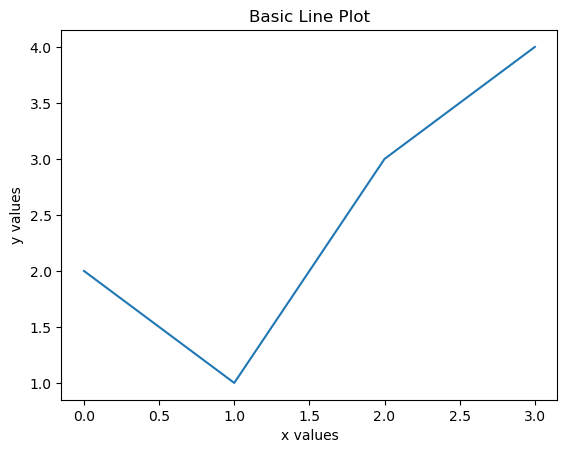

In [202]:
x = [0, 1, 2, 3]
y =  np.array([2, 1, 3, 4])
plt.plot(x, y)
plt.ylabel('y values')
plt.xlabel('x values')
plt.title("Basic Line Plot")
plt.show()

Notice, we don't even have to specify x-coords as matplotlib will automatically generate coordinates for us if none are given.

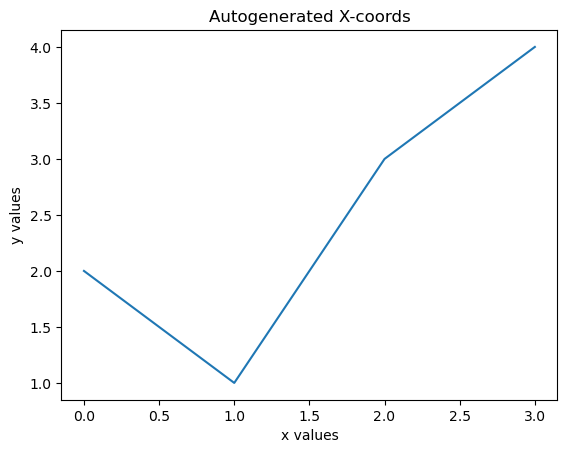

In [203]:
plt.plot(y)
plt.ylabel('y values')
plt.xlabel('x values')
plt.title("Autogenerated X-coords")
plt.show()

Furthermore, the `plt.plot()` method takes in format strings which allow us to combine different colors, line shapes, and plot marker types. Take a look at the below examples, they should speak for themselves!

For more information on all the different arguments the format strings take for `plt.plot()` see the [official docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). 

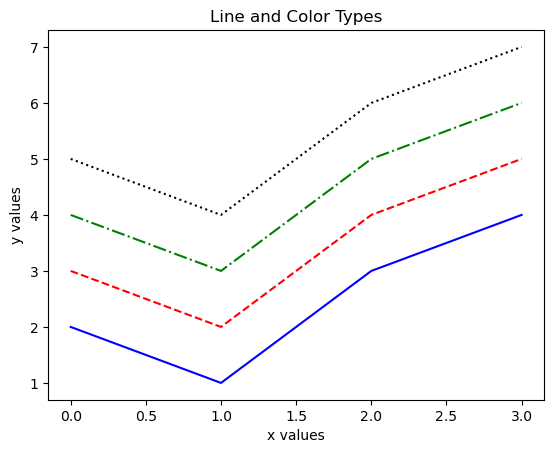

In [204]:
plt.plot(y, 'b-')
plt.plot(y+1, 'r--')
plt.plot(y+2, 'g-.')
plt.plot(y+3, 'k:')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title("Line and Color Types")
plt.show()

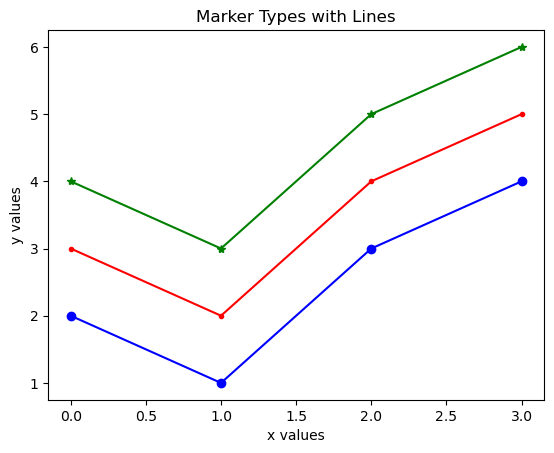

In [205]:
plt.plot(y, 'bo-')
plt.plot(y+1, 'r.-')
plt.plot(y+2, 'g*-')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title("Marker Types with Lines")
plt.show()

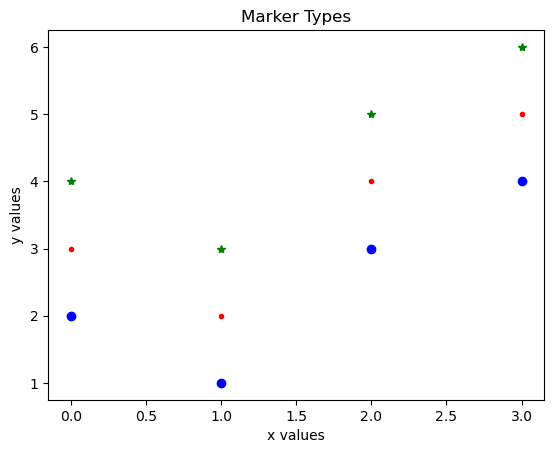

In [206]:
plt.plot(y, 'bo')
plt.plot(y+1, 'r.')
plt.plot(y+2, 'g*')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title("Marker Types")
plt.show()

There is a lot more to matplotlib but this should give you a very basic understanding of how to generate a simple line plots. In future weeks, we'll take a deeper look at other types of plots and how we can use them to gain insight into our data.

# Equations to code

Throughout this class you will need to convert equations into code. Thus, the below practice will focus on converting some different equations into code.

## TODO 15
Let's start off by converting the definition of the dot product into code! Complete this TODO by creating a class called `CosineSimilarity` which computes the cosine similarity (angle between two vectors) between any two vectors. You are **NOT** allowed to use any existing libraries to compute the angle, however you can use NumPy to compute the square root, arccos, and to convert your radians to degrees.

<img src="https://qph.fs.quoracdn.net/main-qimg-121e33a016058274e82f77b05c92aa50" width=300 height=300>

1. Create the `CosineSimilarity` by following the below instructions:
    1. Define the class `CosineSimilarity` using the `class` keyword. 
    2. Define the `__init__()` method which takes in three arguments `self`, `x`, and `z` and saves them as class variables. These two arguments will be the vectors in which the cosine similarity will be computed.
    3. Define a method called `compute_angle()` that takes in no arguments other than `self` (remember `self` is a required argument for methods).
    4. Within the `compute_angle()` method compute the angle between two vectors and return the answer in __degrees__.  Use the following equation to compute the angle between two vector.
    $$ \theta = \text{arccos}(\frac{\mathbf{x} \cdot \mathbf{z}}{||\mathbf{x}||_2 ||\mathbf{z}||_2})
    $$
        1. Hint 1: Recall from the quiz that $\cdot$ represents the dot product and $||\cdot||_2$ represents the L2 norm 
    $$
    ||\mathbf{x}||_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2} = \sqrt{\mathbf{x} \cdot \mathbf{x}}
    $$
    where a vector dotted with itself is the same as squaring the vector.
        2. Hint 2: Use `np.sqrt()` to compute the square root and `np.arccos()` to compute arccos.
        3. Hint 3: The output of `np.arccos()` is in radians! **Be sure** to use `np.degrees()` to convert your output into degrees. If you don't do this you will fail the test.
        4. Hint 4: Due to rounding errors your answer should be close to ~180 degrees.

In [237]:
# TODO 15.1

class CosineSimilarity():
    def __init__(self, x, z):
        self.x = x
        self.z = z
    def compute_angle(self):
        #The below two lines of code are mine
        angle = np.arccos((np.dot(x,z))/((np.sqrt(np.dot(x,x)))*(np.sqrt(np.dot(z,z)))))
        return np.degrees(angle)
        #The below three lines of code are Linh's code that she wanted me to run
        # to make sure my class was running properly
        #rad = np.arccos((np.dot(x,z))/(np.sqrt(x@x)*np.sqrt(z@z)))
        #print("blalall",rad)
        #return np.degrees(rad)
          

Run the below code to test your implementation of the `CosineSimilarity` class.

In [238]:
x = np.array([1, 1])
z = np.array([-2, -2])
cosin_sim = CosineSimilarity(x, z)
angle = cosin_sim.compute_angle()

print(f"angle output: {angle}")

todo_check([
    (np.isclose(angle, 180.0), 'The value of the angle is not approximately 180 degrees! Make sure you converted from radians to degrees.')
])

angle output: 179.99999879258172
Your code PASSED the code check!


## TODO 16

Next, let's review what [normal or Gaussian distribution](https://machinelearningmastery.com/statistical-data-distributions/) is while also practicing some equation to code conversion. Now this weeks math review didn't mention normal distributions but we did lightly cover probability distributions. Recall **a probability distribution is a list of outcomes and their associated probabilities**. Meaning, **a distribution is simply a collection of values or frequencies for a given observation**, like age of a population. A normal distribution is a specific type of probability distribution which looks like the following.
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc8%2FGaussian_distribution.svg%2F1280px-Gaussian_distribution.svg.png&f=1&nofb=1" width=500 height=500>

Further recall a normal distribution has the parameters $\mu$ (referred to as mu) which represents the mean and $\sigma$ (referred to as sigma) represents the standard deviation. Throughout the semester we'll frequently make the assumption that our data is normally distributed. This is because many natural phenomena are like age, height, test-scores, IQ scores, sum of the rolls of two dices and so on follow normal distributions, thus making such an assumption reasonable. As normal distributions are found in so many different places they are one of the important probability distribution in statistics and machine learning!

The formula for a normal distribution is given as follows:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

For this TODO let's convert the normal distribution equation to code and plot what a normal distribution looks like using Matplotlib.

1. Define a function called `gaussian()` that takes in the arguments `x`, `mu`, and `sig`. Convert the above normal equation into code and return the output of the equation. Recall that `mu` represents $\mu$ and `sig` represents $\sigma$.
2. Use the NumPy function `np.linspace()` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)) to generate an array of 120 numbers between -4 and 4. Pass the arguments -4, 4, and 120 to do so. Store the output into the variable `x_values`.
3. Call the `gaussian()` function that receives `x_values`, `mu`, and `sig`. Store the output into the variable `y_values`.
5. Plot the `x_values` and `y_values` using Matplotlib `plt.plot()` function. You should see a normal distribution being plotted like in the above image!


In [229]:
# TODO 16.1
def gaussian(x,mu,sig):
    fx = (1/(sig*np.sqrt(2*np.pi)))*(np.exp((-.5)*np.power(((x-mu)/(sig)),2)))
    return fx

In [230]:
np.linspace(-4, 4, 120).flatten()

array([-4.        , -3.93277311, -3.86554622, -3.79831933, -3.73109244,
       -3.66386555, -3.59663866, -3.52941176, -3.46218487, -3.39495798,
       -3.32773109, -3.2605042 , -3.19327731, -3.12605042, -3.05882353,
       -2.99159664, -2.92436975, -2.85714286, -2.78991597, -2.72268908,
       -2.65546218, -2.58823529, -2.5210084 , -2.45378151, -2.38655462,
       -2.31932773, -2.25210084, -2.18487395, -2.11764706, -2.05042017,
       -1.98319328, -1.91596639, -1.8487395 , -1.78151261, -1.71428571,
       -1.64705882, -1.57983193, -1.51260504, -1.44537815, -1.37815126,
       -1.31092437, -1.24369748, -1.17647059, -1.1092437 , -1.04201681,
       -0.97478992, -0.90756303, -0.84033613, -0.77310924, -0.70588235,
       -0.63865546, -0.57142857, -0.50420168, -0.43697479, -0.3697479 ,
       -0.30252101, -0.23529412, -0.16806723, -0.10084034, -0.03361345,
        0.03361345,  0.10084034,  0.16806723,  0.23529412,  0.30252101,
        0.3697479 ,  0.43697479,  0.50420168,  0.57142857,  0.63

In [231]:
mu = 0 # mean
sig = 1 # std

# TODO 16.2
x_values = np.linspace(-4,4,120).flatten()

display(x_values)

todo_check([
   (x_values.shape == (120,), 'x_values does not have the correct shape of (120,)'),
   (np.all(np.isclose(x_values, np.array([-4.        , -3.93277311, -3.86554622, -3.79831933, -3.73109244,        -3.66386555, -3.59663866, -3.52941176, -3.46218487, -3.39495798,        -3.32773109, -3.2605042 , -3.19327731, -3.12605042, -3.05882353,        -2.99159664, -2.92436975, -2.85714286, -2.78991597, -2.72268908,        -2.65546218, -2.58823529, -2.5210084 , -2.45378151, -2.38655462,        -2.31932773, -2.25210084, -2.18487395, -2.11764706, -2.05042017,        -1.98319328, -1.91596639, -1.8487395 , -1.78151261, -1.71428571,        -1.64705882, -1.57983193, -1.51260504, -1.44537815, -1.37815126,        -1.31092437, -1.24369748, -1.17647059, -1.1092437 , -1.04201681,        -0.97478992, -0.90756303, -0.84033613, -0.77310924, -0.70588235,        -0.63865546, -0.57142857, -0.50420168, -0.43697479, -0.3697479 ,        -0.30252101, -0.23529412, -0.16806723, -0.10084034, -0.03361345,         0.03361345,  0.10084034,  0.16806723,  0.23529412,  0.30252101,         0.3697479 ,  0.43697479,  0.50420168,  0.57142857,  0.63865546,         0.70588235,  0.77310924,  0.84033613,  0.90756303,  0.97478992,         1.04201681,  1.1092437 ,  1.17647059,  1.24369748,  1.31092437,         1.37815126,  1.44537815,  1.51260504,  1.57983193,  1.64705882,         1.71428571,  1.78151261,  1.8487395 ,  1.91596639,  1.98319328,         2.05042017,  2.11764706,  2.18487395,  2.25210084,  2.31932773,         2.38655462,  2.45378151,  2.5210084 ,  2.58823529,  2.65546218,         2.72268908,  2.78991597,  2.85714286,  2.92436975,  2.99159664,         3.05882353,  3.12605042,  3.19327731,  3.2605042 ,  3.32773109,         3.39495798,  3.46218487,  3.52941176,  3.59663866,  3.66386555,         3.73109244,  3.79831933,  3.86554622,  3.93277311,  4.        ]), rtol=.001)), 'x_values does not have the correct values')
])

array([-4.        , -3.93277311, -3.86554622, -3.79831933, -3.73109244,
       -3.66386555, -3.59663866, -3.52941176, -3.46218487, -3.39495798,
       -3.32773109, -3.2605042 , -3.19327731, -3.12605042, -3.05882353,
       -2.99159664, -2.92436975, -2.85714286, -2.78991597, -2.72268908,
       -2.65546218, -2.58823529, -2.5210084 , -2.45378151, -2.38655462,
       -2.31932773, -2.25210084, -2.18487395, -2.11764706, -2.05042017,
       -1.98319328, -1.91596639, -1.8487395 , -1.78151261, -1.71428571,
       -1.64705882, -1.57983193, -1.51260504, -1.44537815, -1.37815126,
       -1.31092437, -1.24369748, -1.17647059, -1.1092437 , -1.04201681,
       -0.97478992, -0.90756303, -0.84033613, -0.77310924, -0.70588235,
       -0.63865546, -0.57142857, -0.50420168, -0.43697479, -0.3697479 ,
       -0.30252101, -0.23529412, -0.16806723, -0.10084034, -0.03361345,
        0.03361345,  0.10084034,  0.16806723,  0.23529412,  0.30252101,
        0.3697479 ,  0.43697479,  0.50420168,  0.57142857,  0.63

Your code PASSED the code check!


In [232]:
# TODO 16.3
y_values = gaussian(x_values, mu, sig)

display(y_values)

todo_check([
    (y_values.shape == (120,), 'y_values does not have the correct shape of (120,)'),
    (np.all(np.isclose(y_values, np.array([1.33830226e-04, 1.74726145e-04, 2.27090415e-04, 2.93817012e-04,        3.78435874e-04, 4.85226918e-04, 6.19347941e-04, 7.86976449e-04,        9.95465009e-04, 1.25350909e-03, 1.57132566e-03, 1.96083994e-03,        2.43587675e-03, 3.01235189e-03, 3.70845762e-03, 4.54483545e-03,        5.54472782e-03, 6.73409948e-03, 8.14171785e-03, 9.79918133e-03,        1.17408832e-02, 1.40038988e-02, 1.66277845e-02, 1.96542754e-02,        2.31268728e-02, 2.70903123e-02, 3.15899063e-02, 3.66707582e-02,        4.23768496e-02, 4.87500056e-02, 5.58287494e-02, 6.36470609e-02,        7.22330635e-02, 8.16076628e-02, 9.17831740e-02, 1.02761972e-01,        1.14535209e-01, 1.27081643e-01, 1.40366624e-01, 1.54341287e-01,        1.68941989e-01, 1.84090049e-01, 1.99691809e-01, 2.15639052e-01,        2.31809806e-01, 2.48069526e-01, 2.64272673e-01, 2.80264650e-01,        2.95884091e-01, 3.10965445e-01, 3.25341808e-01, 3.38847936e-01,        3.51323369e-01, 3.62615579e-01, 3.72583059e-01, 3.81098269e-01,        3.88050344e-01, 3.93347502e-01, 3.96919051e-01, 3.98716969e-01,        3.98716969e-01, 3.96919051e-01, 3.93347502e-01, 3.88050344e-01,        3.81098269e-01, 3.72583059e-01, 3.62615579e-01, 3.51323369e-01,        3.38847936e-01, 3.25341808e-01, 3.10965445e-01, 2.95884091e-01,        2.80264650e-01, 2.64272673e-01, 2.48069526e-01, 2.31809806e-01,        2.15639052e-01, 1.99691809e-01, 1.84090049e-01, 1.68941989e-01,        1.54341287e-01, 1.40366624e-01, 1.27081643e-01, 1.14535209e-01,        1.02761972e-01, 9.17831740e-02, 8.16076628e-02, 7.22330635e-02,        6.36470609e-02, 5.58287494e-02, 4.87500056e-02, 4.23768496e-02,        3.66707582e-02, 3.15899063e-02, 2.70903123e-02, 2.31268728e-02,        1.96542754e-02, 1.66277845e-02, 1.40038988e-02, 1.17408832e-02,        9.79918133e-03, 8.14171785e-03, 6.73409948e-03, 5.54472782e-03,        4.54483545e-03, 3.70845762e-03, 3.01235189e-03, 2.43587675e-03,        1.96083994e-03, 1.57132566e-03, 1.25350909e-03, 9.95465009e-04,        7.86976449e-04, 6.19347941e-04, 4.85226918e-04, 3.78435874e-04,        2.93817012e-04, 2.27090415e-04, 1.74726145e-04, 1.33830226e-04]),rtol=.001)), 'y_values does not contain the correct values')
])

array([1.33830226e-04, 1.74726145e-04, 2.27090415e-04, 2.93817012e-04,
       3.78435874e-04, 4.85226918e-04, 6.19347941e-04, 7.86976449e-04,
       9.95465009e-04, 1.25350909e-03, 1.57132566e-03, 1.96083994e-03,
       2.43587675e-03, 3.01235189e-03, 3.70845762e-03, 4.54483545e-03,
       5.54472782e-03, 6.73409948e-03, 8.14171785e-03, 9.79918133e-03,
       1.17408832e-02, 1.40038988e-02, 1.66277845e-02, 1.96542754e-02,
       2.31268728e-02, 2.70903123e-02, 3.15899063e-02, 3.66707582e-02,
       4.23768496e-02, 4.87500056e-02, 5.58287494e-02, 6.36470609e-02,
       7.22330635e-02, 8.16076628e-02, 9.17831740e-02, 1.02761972e-01,
       1.14535209e-01, 1.27081643e-01, 1.40366624e-01, 1.54341287e-01,
       1.68941989e-01, 1.84090049e-01, 1.99691809e-01, 2.15639052e-01,
       2.31809806e-01, 2.48069526e-01, 2.64272673e-01, 2.80264650e-01,
       2.95884091e-01, 3.10965445e-01, 3.25341808e-01, 3.38847936e-01,
       3.51323369e-01, 3.62615579e-01, 3.72583059e-01, 3.81098269e-01,
      

Your code PASSED the code check!


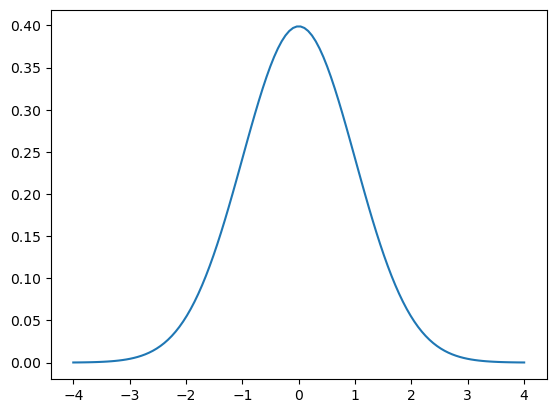

In [233]:
# TODO 16.4
plots = plt.plot(x_values, y_values)

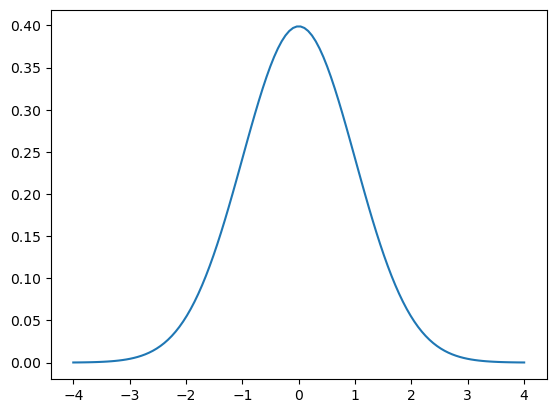

In [234]:
# TODO 16.4
plots = plt.plot(x_values, y_values)